# <span style="color:red">HOUSE PRICE PREDICTION ADVANCED REGRESSION- PRCP-1020-HousePricePred</span>


## Team-ID PTID-CDS-JAN-25-2373

# Problem statements

Task 1

Prepare a complete data analysis report on the given data.

Task 2

a) Create a robust machine learning algorithm to accurately predict the price of the house given the various factors across the market.   

b) Determine the relationship between the house features and how the price varies based on this.

Task3

Come up with suggestions for the customer to buy the house according to the area, price and other requirements.


# Attribute Information

●	SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

●	MSSubClass: The building class

●	MSZoning: The general zoning classification

●	LotFrontage: Linear feet of street connected to property

●	LotArea: Lot size in square feet

●	Street: Type of road access

●	Alley: Type of alley access

●	LotShape: General shape of property

●	LandContour: Flatness of the property

●	Utilities: Type of utilities available

●	LotConfig: Lot configuration

●	LandSlope: Slope of property

●	Neighborhood: Physical locations within Ames city limits

●	Condition1: Proximity to main road or railroad

●	Condition2: Proximity to main road or railroad (if a second is present)

●	BldgType: Type of dwelling

●	HouseStyle: Style of dwelling

●	OverallQual: Overall material and finish quality

●	OverallCond: Overall condition rating

●	YearBuilt: Original construction date

●	YearRemodAdd: Remodel date

●	RoofStyle: Type of roof

●	RoofMatl: Roof material

●	Exterior1st: Exterior covering on house

●	Exterior2nd: Exterior covering on house (if more than one material)

●	MasVnrType: Masonry veneer type

●	MasVnrArea: Masonry veneer area in square feet

●	ExterQual: Exterior material quality

●	ExterCond: Present condition of the material on the exterior

●	Foundation: Type of foundation

●	BsmtQual: Height of the basement

●	BsmtCond: General condition of the basement

●	BsmtExposure: Walkout or garden level basement walls

●	BsmtFinType1: Quality of basement finished area

●	BsmtFinSF1: Type 1 finished square feet

●	BsmtFinType2: Quality of second finished area (if present)

●	BsmtFinSF2: Type 2 finished square feet

●	BsmtUnfSF: Unfinished square feet of basement area

●	TotalBsmtSF: Total square feet of basement area

●	Heating: Type of heating

●	HeatingQC: Heating quality and condition

●	CentralAir: Central air conditioning

●	Electrical: Electrical system

●	1stFlrSF: First Floor square feet

●	2ndFlrSF: Second floor square feet

●	LowQualFinSF: Low quality finished square feet (all floors)

●	GrLivArea: Above grade (ground) living area square feet

●	BsmtFullBath: Basement full bathrooms

●	BsmtHalfBath: Basement half bathrooms

●	FullBath: Full bathrooms above grade

●	HalfBath: Half baths above grade

●	Bedroom: Number of bedrooms above basement level

●	Kitchen: Number of kitchens

●	KitchenQual: Kitchen quality

●	TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

●	Functional: Home functionality rating

●	Fireplaces: Number of fireplaces

●	FireplaceQu: Fireplace quality

●	GarageType: Garage location

●	GarageYrBlt: Year garage was built

●	GarageFinish: Interior finish of the garage

●	GarageCars: Size of garage in car capacity

●	GarageArea: Size of garage in square feet

●	GarageQual: Garage quality

●	GarageCond: Garage condition

●	PavedDrive: Paved driveway

●	WoodDeckSF: Wood deck area in square feet

●	OpenPorchSF: Open porch area in square feet

●	EnclosedPorch: Enclosed porch area in square feet

●	3SsnPorch: Three season porch area in square feet

●	ScreenPorch: Screen porch area in square feet

●	PoolArea: Pool area in square feet

●	PoolQC: Pool quality

●	Fence: Fence quality

●	MiscFeature: Miscellaneous feature not covered in other categories

●	MiscVal: $Value of miscellaneous feature

●	MoSold: Month Sold

●	YrSold: Year Sold

●	SaleType: Type of sale

●	SaleCondition: Condition of sale

## IMPORTING BASIC LIBRARIES




In [2]:
import numpy as np  # Numerical operations for arrays and matrices
import pandas as pd  # Data manipulation and analysis
import seaborn as sns  # Data visualization with statistical graphics
import matplotlib.pyplot as plt  # Data visualization (e.g., plotting images or graphs)
%matplotlib inline

import cv2 as cv  # Image processing tasks (e.g., reading, resizing images)
import os  # File system operations (e.g., navigating directories, accessing files)
import random  # Introducing randomness (e.g., shuffling data)

# **Libraries to Ignore Warnings**
import warnings  # Suppress unnecessary warnings
warnings.filterwarnings('always')  # Always show warnings (can be customized)
warnings.filterwarnings('ignore')  # Ignore all warnings


## LOADING THE DATASET

In [3]:
raw_data=pd.read_csv('/content/drive/MyDrive/Project_datamites/House_price.csv')

In [4]:
data=raw_data.copy()

## BASIC CHECKS

In [5]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
data.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [7]:
data.shape

(1460, 81)

WE HAVE 1460 ROWS AND 81 COLUMNS

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

WE COULD NOTICE SOME NULL VALUES AND ALSO CATEGORICAL VALUES

In [9]:
#CATEGORICAL COLUMNS
data.dtypes[data.dtypes=='object']

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType         object
SaleCondition    object
dtype: object

In [10]:
# NUMERICAL COUMNS
data.dtypes[data.dtypes!='object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

##  NULL VALUES AND IT'S COUNT

In [11]:
null_values = data.isnull().sum().to_frame().rename(columns={0: "Number of Null values"})
null_values["Percentage of Null Values"] = round((null_values["Number of Null values"] / len(data)) * 100, 2)

# Filter out columns where there are no missing values
missing_data = null_values[null_values["Number of Null values"] > 0]

# Sort by the number of null values in descending order
missing_data = missing_data.sort_values(by="Number of Null values", ascending=False)

# Display the sorted missing data summary
print(missing_data)



              Number of Null values  Percentage of Null Values
PoolQC                         1453                      99.52
MiscFeature                    1406                      96.30
Alley                          1369                      93.77
Fence                          1179                      80.75
MasVnrType                      872                      59.73
FireplaceQu                     690                      47.26
LotFrontage                     259                      17.74
GarageType                       81                       5.55
GarageYrBlt                      81                       5.55
GarageFinish                     81                       5.55
GarageQual                       81                       5.55
GarageCond                       81                       5.55
BsmtFinType2                     38                       2.60
BsmtExposure                     38                       2.60
BsmtFinType1                     37                    

In [12]:
null_values=data.isna().sum()
null_values[null_values>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [13]:
# CHECKING FOR DUPLICATES VALUES
duplicates = data[data.duplicated()]
duplicates

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

 NO DUPLICATES FOUND

In [14]:
#  unique values in categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
unique_categorical_values = data[categorical_columns].nunique()

print("Unique values in each categorical column:")
print(unique_categorical_values)

for column in categorical_columns:
    print(f"\nUnique values in '{column}':")
    print(data[column].unique())


Unique values in each categorical column:
MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        3
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

Unique values in 'MSZoning':
['RL' 'RM' 'C (all)' 'FV' 'RH']

Unique values in 'Stre

In [15]:
# Separating numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns

# Separating categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

numerical_data = data[numerical_columns]
categorical_data = data[categorical_columns]



# **Statistical Analysis**

In [16]:
# Ensure all columns are visible
pd.set_option('display.max_columns', None)

In [17]:
data.describe(include='number').round(2)

Id  MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
count  1460.00      1460.0      1201.00    1460.00      1460.00      1460.00   
mean    730.50        56.9        70.05   10516.83         6.10         5.58   
std     421.61        42.3        24.28    9981.26         1.38         1.11   
min       1.00        20.0        21.00    1300.00         1.00         1.00   
25%     365.75        20.0        59.00    7553.50         5.00         5.00   
50%     730.50        50.0        69.00    9478.50         6.00         5.00   
75%    1095.25        70.0        80.00   11601.50         7.00         6.00   
max    1460.00       190.0       313.00  215245.00        10.00         9.00   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
count    1460.00       1460.00     1452.00     1460.00     1460.00    1460.00   
mean     1971.27       1984.87      103.69      443.64       46.55     567.24   
std        30.20         20.65      181.07      456.10      161.32     441.87   
min      1872.00       1950.00        0.00        0.00        0.00       0.00   
25%      1954.00       1967.00        0.00        0.00        0.00     223.00   
50%      1973.00       1994.00        0.00      383.50        0.00     477.50   
75%      2000.00       2004.00      166.00      712.25        0.00     808.00   
max      2010.00       2010.00     1600.00     5644.00     1474.00    2336.00   

       TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
count      1460.00   1460.00   1460.00       1460.00    1460.00       1460.00   
mean       1057.43   1162.63    346.99          5.84    1515.46          0.43   
std         438.71    386.59    436.53         48.62     525.48          0.52   
min           0.00    334.00      0.00          0.00     334.00          0.00   
25%         795.75    882.00      0.00          0.00    1129.50          0.00   
50%         991.50   1087.00      0.00          0.00    1464.00          0.00   
75%        1298.25   1391.25    728.00          0.00    1776.75          1.00   
max        6110.00   4692.00   2065.00        572.00    5642.00          3.00   

       BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
count       1460.00   1460.00   1460.00       1460.00       1460.00   
mean           0.06      1.57      0.38          2.87          1.05   
std            0.24      0.55      0.50          0.82          0.22   
min            0.00      0.00      0.00          0.00          0.00   
25%            0.00      1.00      0.00          2.00          1.00   
50%            0.00      2.00      0.00          3.00          1.00   
75%            0.00      2.00      1.00          3.00          1.00   
max            2.00      3.00      2.00          8.00          3.00   

       TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
count       1460.00     1460.00      1379.00     1460.00     1460.00   
mean           6.52        0.61      1978.51        1.77      472.98   
std            1.63        0.64        24.69        0.75      213.80   
min            2.00        0.00      1900.00        0.00        0.00   
25%            5.00        0.00      1961.00        1.00      334.50   
50%            6.00        1.00      1980.00        2.00      480.00   
75%            7.00        1.00      2002.00        2.00      576.00   
max           14.00        3.00      2010.00        4.00     1418.00   

       WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count     1460.00      1460.00        1460.00    1460.00      1460.00   
mean        94.24        46.66          21.95       3.41        15.06   
std        125.34        66.26          61.12      29.32        55.76   
min          0.00         0.00           0.00       0.00         0.00   
25%          0.00         0.00           0.00       0.00         0.00   
50%          0.00        25.00           0.00       0.00         0.00   
75%        168.00        68.00 

In [18]:
data.describe(include='object')

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460        588      1460   
unique         6        8          15          16          3         4   
top        Gable  CompShg     VinylSd     VinylSd    BrkFace        TA   
freq        1141     1434         515         504        445       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

# EXPLORATORY DATA ANALYSIS AND DETECTING ANAMOLIES

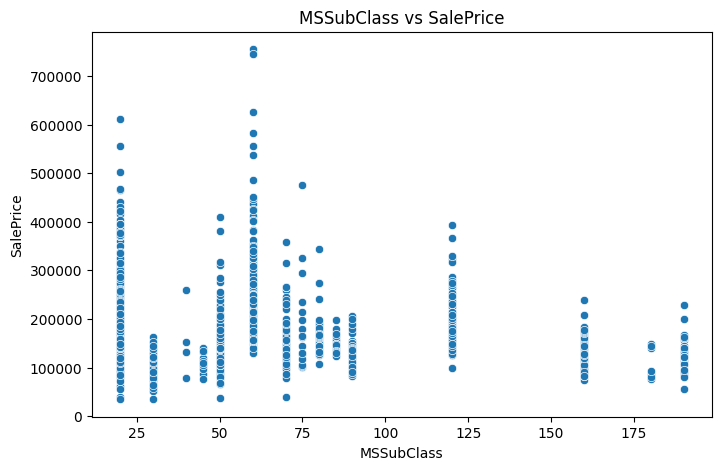

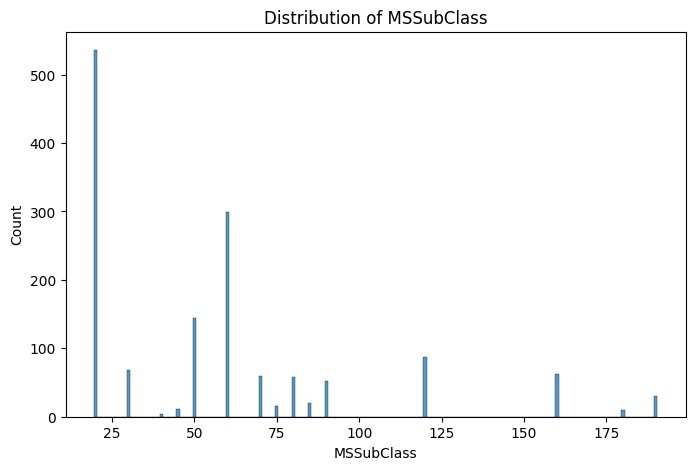

In [19]:
# Scatter plot (MSSubClass vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='MSSubClass', y='SalePrice')
plt.title("MSSubClass vs SalePrice")
plt.show()

# Histogram of MSSubClass
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='MSSubClass', discrete=True)
plt.title("Distribution of MSSubClass")
plt.show()


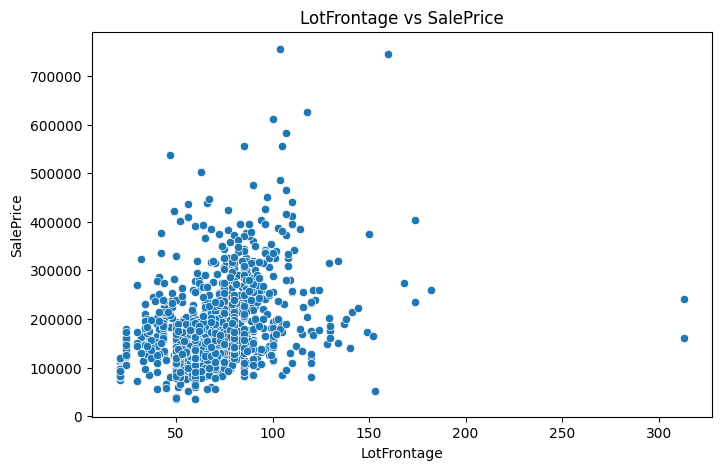

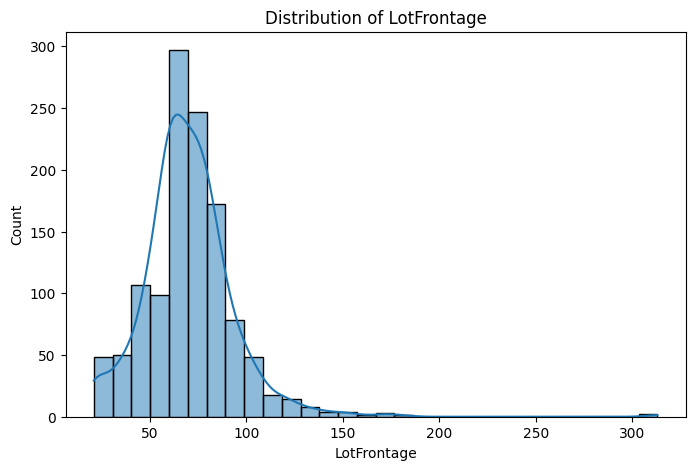

In [20]:
# Scatter plot (LotFrontage vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='LotFrontage', y='SalePrice')
plt.title("LotFrontage vs SalePrice")
plt.show()

# Histogram of LotFrontage
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='LotFrontage', bins=30, kde=True)
plt.title("Distribution of LotFrontage")
plt.show()


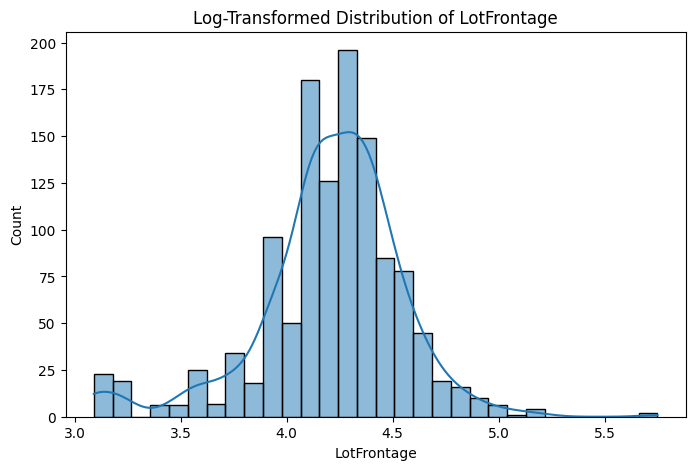

In [21]:
# NORMALISING THE SKEWED(DISTORTED) DATA USING LOG
data['LotFrontage'] = np.log1p(data['LotFrontage'])  # log(1 + x) to handle zeros


plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='LotFrontage', bins=30, kde=True)
plt.title("Log-Transformed Distribution of LotFrontage")
plt.show()


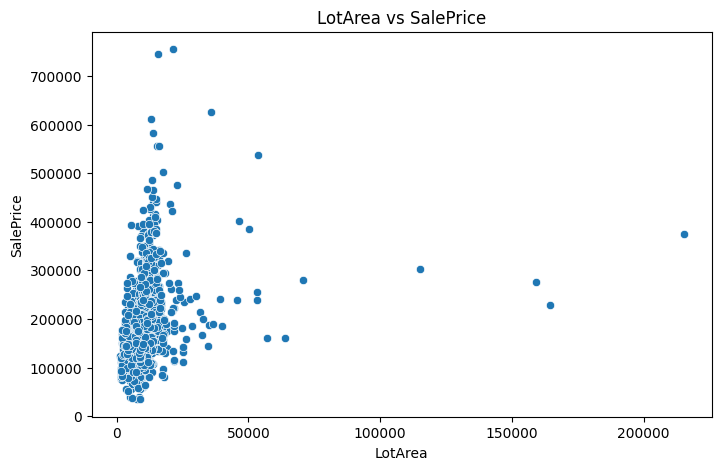

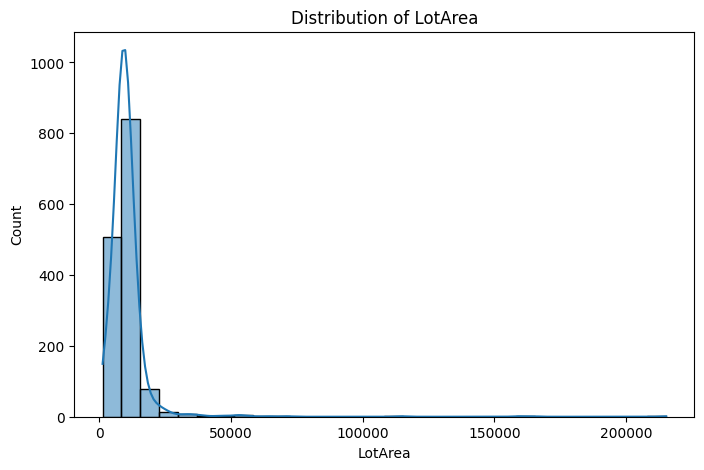

In [22]:
# Scatter plot (LotArea vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='LotArea', y='SalePrice')
plt.title("LotArea vs SalePrice")
plt.show()

# Histogram of LotArea
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='LotArea', bins=30, kde=True)
plt.title("Distribution of LotArea")
plt.show()


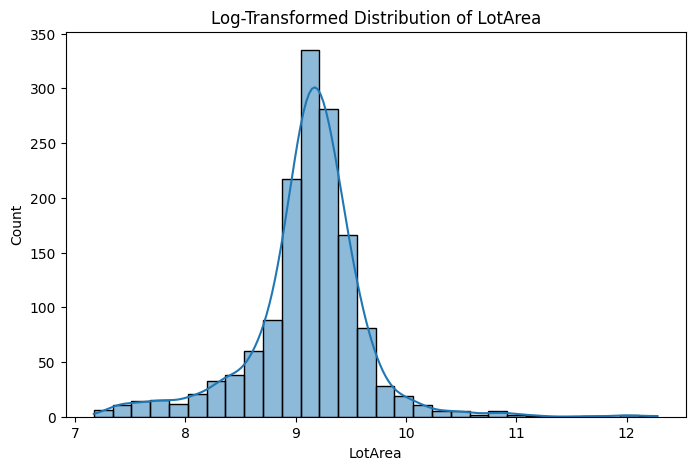

In [23]:
# NORMALISING THE SKEWED(DISTORTED) DATA USING LOG
data['LotArea'] = np.log1p(data['LotArea'])  # log(1 + x) to handle zeros

plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='LotArea', bins=30, kde=True)
plt.title("Log-Transformed Distribution of LotArea")
plt.show()


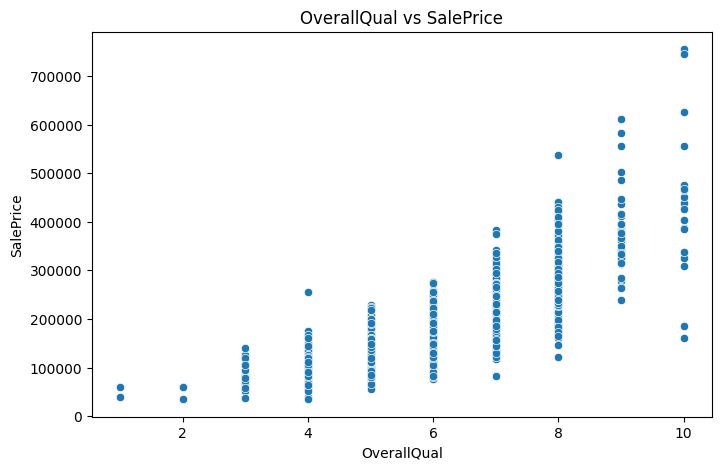

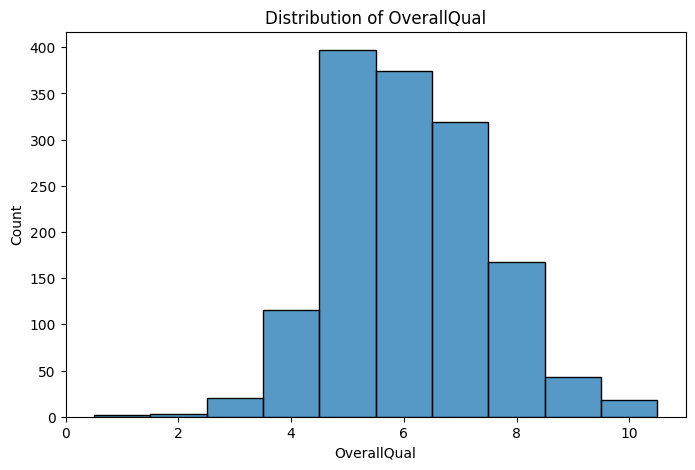

In [24]:
# Scatter plot (OverallQual vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='OverallQual', y='SalePrice')
plt.title("OverallQual vs SalePrice")
plt.show()

# Histogram of OverallQual
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='OverallQual', bins=10, discrete=True)
plt.title("Distribution of OverallQual")
plt.show()



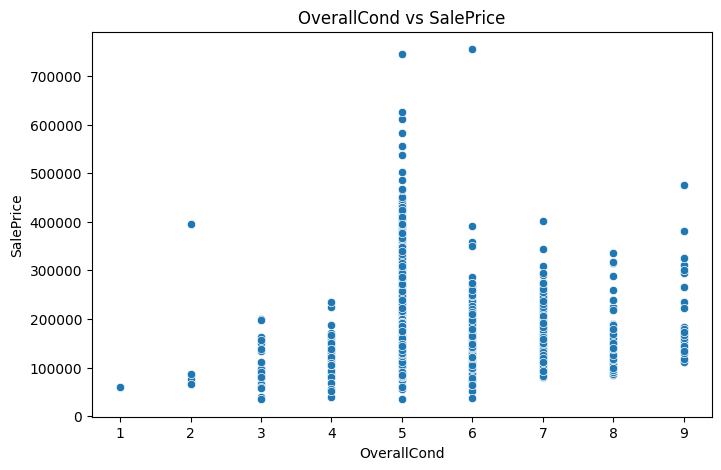

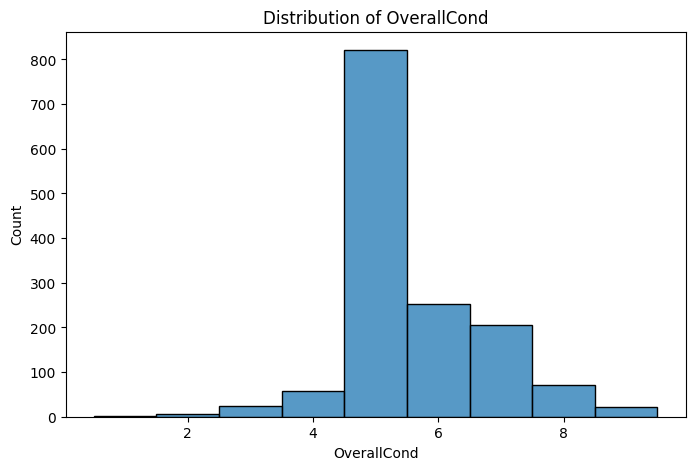

In [25]:
# Scatter plot (OverallCond vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='OverallCond', y='SalePrice')
plt.title("OverallCond vs SalePrice")
plt.show()

# Histogram of OverallCond
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='OverallCond', bins=10, discrete=True)
plt.title("Distribution of OverallCond")
plt.show()


In [26]:
data.query('OverallCond==2 & SalePrice>300000')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
378  379          20       RL     4.488636  9.34093   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
378         Lvl    AllPub    Corner       Gtl      StoneBr       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
378       Norm     1Fam     1Story            9            2       2010   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
378          2010       Hip  CompShg     VinylSd     VinylSd      Stone   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
378       350.0        Gd        TA      PConc       Ex       TA           Av   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
378          GLQ        1445          Unf           0        411         1856   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
378    GasA        Ex          Y      SBrkr      1856         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
378       1856             1             0         1         1             1   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
378             1          Ex             8        Typ           1   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
378          Ex     Attchd       2010.0          Fin           3         834   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
378         TA         TA          Y         113            0              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
378          0            0         0    NaN   NaN         NaN        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  
378       6    2010      New       Partial     394432

In [27]:
data.query('OverallCond==5 & SalePrice>700000')

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
1182  1183          60       RL     5.081404  9.656563   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1182         Lvl    AllPub    Corner       Gtl      NoRidge       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1182       Norm     1Fam     2Story           10            5       1996   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1182          1996       Hip  CompShg     Wd Sdng     ImStucc        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1182         0.0        Gd        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1182           Av          GLQ        2096          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1182        300         2396    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1182      2411      2065             0       4476             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1182         3         1             4             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1182            10        Typ           2          TA     Attchd       1996.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1182          Fin           3         813         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1182         171           78              0          0            0   

      PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1182       555     Ex  MnPrv         NaN        0       7    2007       WD   

     SaleCondition  SalePrice  
1182       Abnorml     745000

In [28]:
data.query('OverallCond==6 & SalePrice>700000')

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
691  692          60       RL      4.65396  9.977481   Pave   NaN      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
691         Lvl    AllPub    Corner       Gtl      NoRidge       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
691       Norm     1Fam     2Story           10            6       1994   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
691          1995     Gable  WdShngl     HdBoard     HdBoard    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
691      1170.0        Ex        TA      PConc       Ex       TA           Gd   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
691          GLQ        1455          Unf           0        989         2444   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
691    GasA        Ex          Y      SBrkr      2444      1872             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
691       4316             0             1         3         1             4   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
691             1          Ex            10        Typ           2   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
691          Ex     Attchd       1994.0          Fin           3         832   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
691         TA         TA          Y         382           50              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
691          0            0         0    NaN   NaN         NaN        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  
691       1    2007       WD        Normal     755000

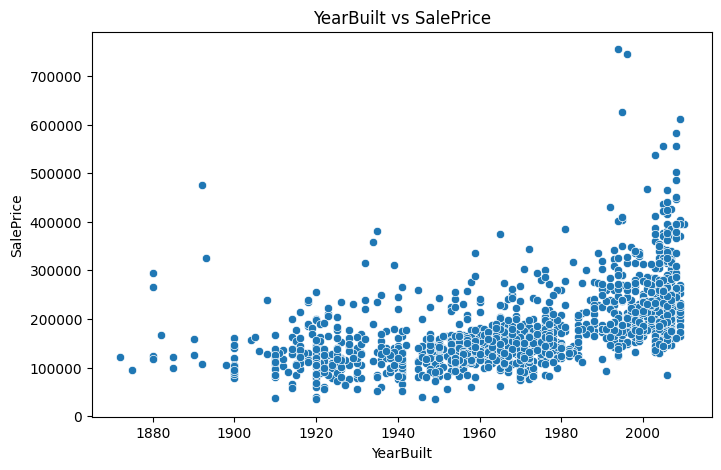

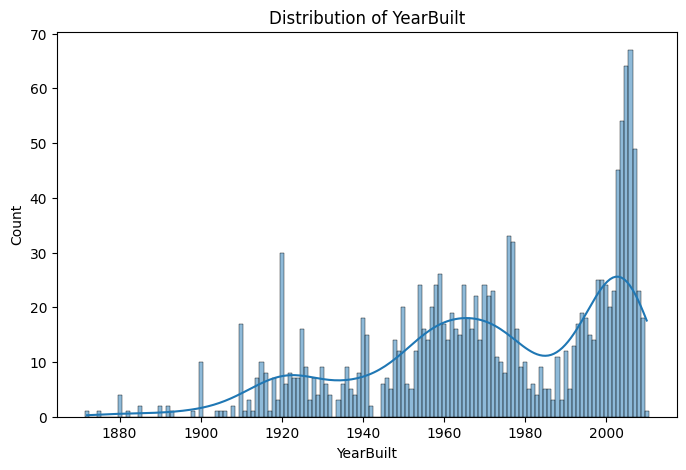

In [29]:
# Scatter plot (YearBuilt vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='YearBuilt', y='SalePrice')
plt.title("YearBuilt vs SalePrice")
plt.show()

# Histogram of YearBuilt
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='YearBuilt', bins=30, kde=True, discrete=True)
plt.title("Distribution of YearBuilt")
plt.show()


In [30]:
data.query('YearBuilt <1900 & SalePrice>400000')

Id  MSSubClass MSZoning  LotFrontage    LotArea Street Alley LotShape  \
185  186          75       RM      4.51086  10.041117   Pave   NaN      IR2   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
185         Lvl    AllPub    Inside       Gtl      OldTown     Artery   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
185       Norm     1Fam     2.5Fin           10            9       1892   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
185          1993     Gable  WdShngl     Wd Sdng     Wd Sdng        NaN   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
185         0.0        Gd        Gd     BrkTil       TA       TA           Mn   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
185          Unf           0          Unf           0       1107         1107   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
185    GasA        Ex          Y      SBrkr      1518      1518           572   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
185       3608             0             0         2         1             4   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
185             1          Ex            12        Typ           2   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
185          TA     Detchd       1993.0          Unf           3         840   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
185         Ex         TA          Y           0          260              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  \
185          0          410         0    NaN  GdPrv         NaN        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  
185       6    2006       WD        Normal     475000

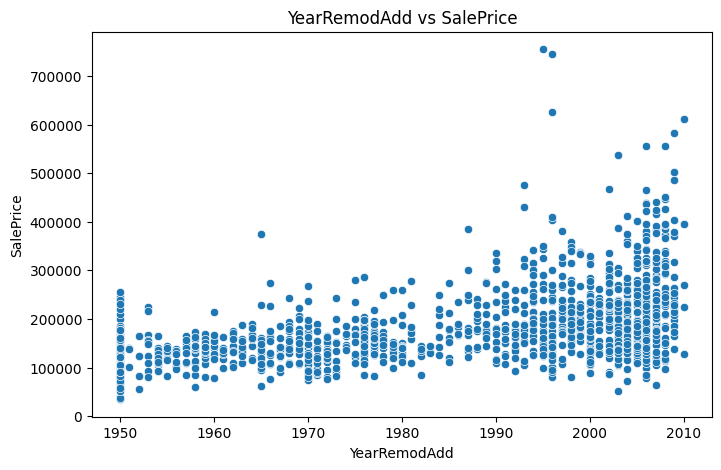

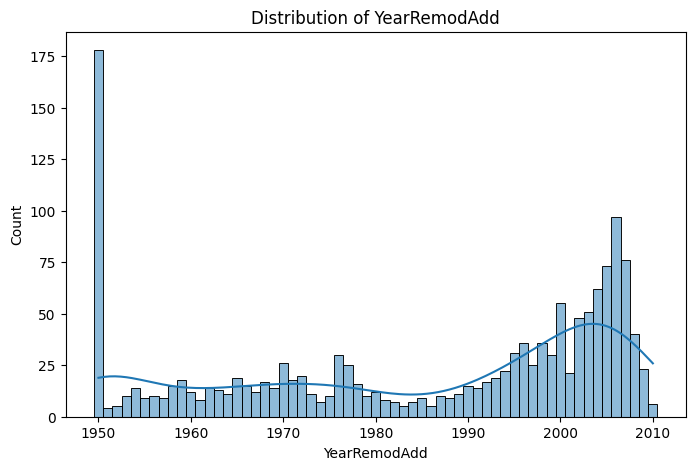

In [31]:
# Scatter plot (YearRemodAdd vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='YearRemodAdd', y='SalePrice')
plt.title("YearRemodAdd vs SalePrice")
plt.show()

# Histogram of YearRemodAdd
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='YearRemodAdd', bins=30, kde=True, discrete=True)
plt.title("Distribution of YearRemodAdd")
plt.show()


In [32]:
data.query('YearRemodAdd <1970 & SalePrice>300000')

Id  MSSubClass MSZoning  LotFrontage    LotArea Street Alley LotShape  \
313  314          20       RL      5.01728  12.279537   Pave   NaN      IR3   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
313         Low    AllPub    Inside       Sev       Timber       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
313       Norm     1Fam     1Story            7            5       1965   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
313          1965       Hip  CompShg     BrkFace     BrkFace        NaN   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
313         0.0        TA        TA     CBlock       Gd       TA           Gd   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
313          ALQ        1236          Rec         820         80         2136   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
313    GasW        TA          Y      SBrkr      2036         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
313       2036             2             0         2         0             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
313             1          TA             8        Typ           2   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
313          Gd     Attchd       1965.0          RFn           2         513   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
313         TA         TA          Y           0            0              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
313          0            0         0    NaN   NaN         NaN        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  
313       6    2009       WD        Normal     375000

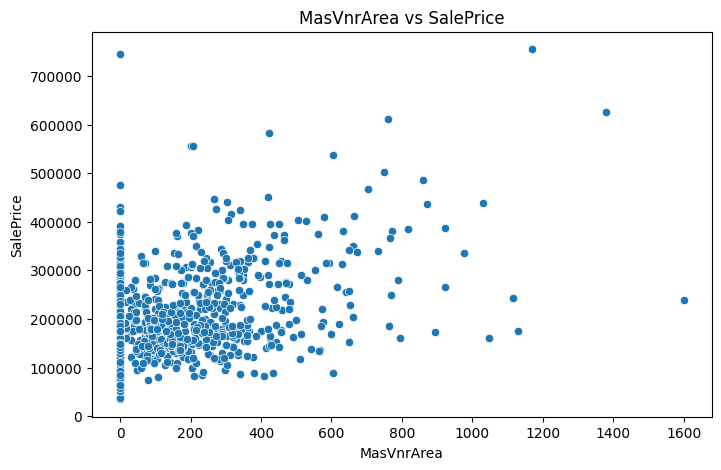

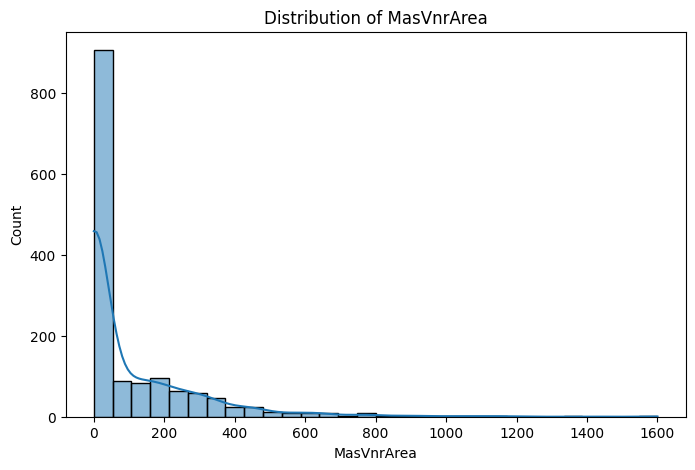

In [33]:
# Scatter plot (MasVnrArea vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='MasVnrArea', y='SalePrice')
plt.title("MasVnrArea vs SalePrice")
plt.show()

# Histogram of MasVnrArea
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='MasVnrArea', bins=30, kde=True)
plt.title("Distribution of MasVnrArea")
plt.show()


In [34]:
data.query('MasVnrArea>1500')

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
297  298          60       FV     4.204693  8.909235   Pave  Pave      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
297         Lvl    AllPub    Inside       Gtl      Somerst       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
297       Norm     1Fam     2Story            7            5       1997   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
297          1998       Hip  CompShg     VinylSd     VinylSd    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
297      1600.0        Gd        TA      PConc       Gd       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
297          BLQ         649          Unf           0        326          975   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
297    GasA        Ex          Y      SBrkr       975       975             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
297       1950             0             0         2         1             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
297             1          Gd             7        Typ           1   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
297          TA     Detchd       1997.0          RFn           2         576   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
297         TA         TA          Y           0           10              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
297          0          198         0    NaN   NaN         NaN        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  
297       6    2007       WD        Normal     239000

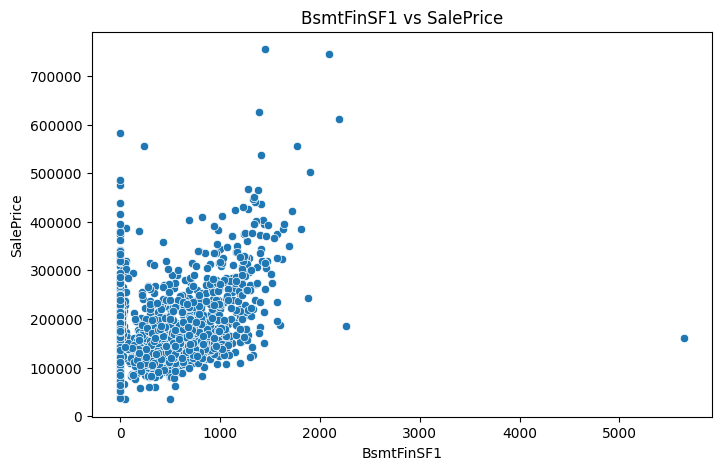

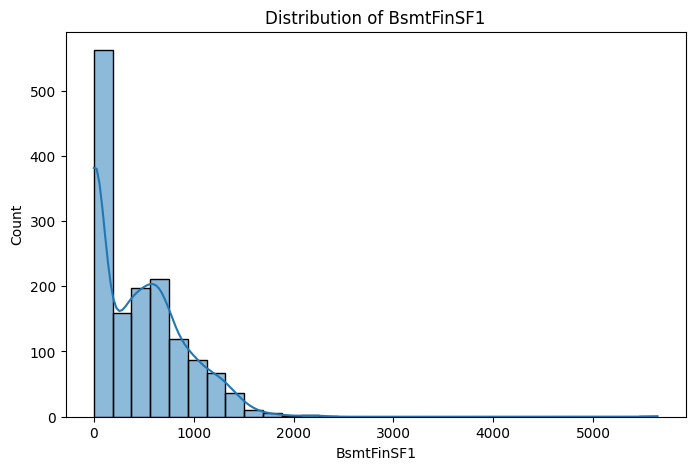

In [35]:
# Scatter plot (BsmtFinSF1 vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='BsmtFinSF1', y='SalePrice')
plt.title("BsmtFinSF1 vs SalePrice")
plt.show()

# Histogram of BsmtFinSF1
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='BsmtFinSF1', bins=30, kde=True)
plt.title("Distribution of BsmtFinSF1")
plt.show()



In [36]:
data.query('BsmtFinSF1>5000')

Id  MSSubClass MSZoning  LotFrontage    LotArea Street Alley LotShape  \
1298  1299          60       RL     5.749393  11.064887   Pave   NaN      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1298       Norm     1Fam     2Story           10            5       2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1298       796.0        Ex        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1298           Gd          GLQ        5644          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1298        466         6110    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1298      4692       950             0       5642             2             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1298         2         1             3             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1298            12        Typ           3          Gd     Attchd       2008.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1298          Fin           2        1418         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1298         214          292              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1298       480     Gd   NaN         NaN        0       1    2008      New   

     SaleCondition  SalePrice  
1298       Partial     160000

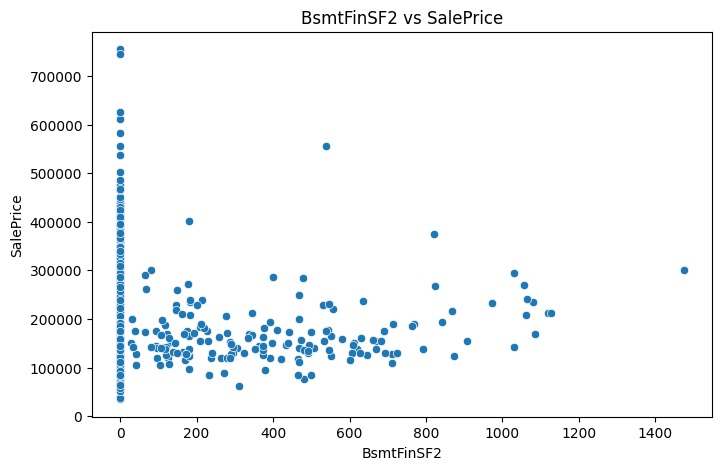

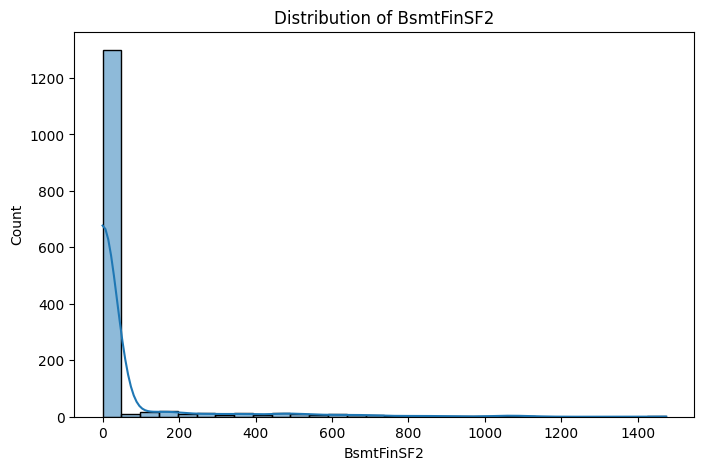

In [37]:
# Scatter plot (BsmtFinSF2 vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='BsmtFinSF2', y='SalePrice')
plt.title("BsmtFinSF2 vs SalePrice")
plt.show()

# Histogram of BsmtFinSF2
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='BsmtFinSF2', bins=30, kde=True)
plt.title("Distribution of BsmtFinSF2")
plt.show()


In [38]:
data.query('BsmtFinSF2>1400')

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
322  323          60       RL     4.465908  9.247732   Pave   NaN      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
322         Lvl    AllPub    Inside       Gtl      SawyerW       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
322       Norm     1Fam     2Story            7            5       1986   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
322          1987     Gable  CompShg     Plywood     Plywood    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
322       172.0        Gd        TA     CBlock       TA       TA           Gd   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
322          LwQ          28          ALQ        1474          0         1502   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
322    GasA        Ex          Y      SBrkr      1553      1177             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
322       2730             1             0         2         1             4   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
322             1          Gd             8        Typ           1   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
322          TA     Attchd       1987.0          Fin           2         576   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
322         TA         TA          Y         201           96              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  \
322          0            0         0    NaN  MnPrv         NaN        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  
322       8    2007       WD        Normal     301000

In [39]:
data.query('BsmtFinSF2>400& SalePrice>500000')

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
440  441          20       RL     4.663439  9.644199   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
440         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
440       Norm     1Fam     1Story           10            5       2008   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
440          2008       Hip  CompShg     VinylSd     VinylSd      Stone   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
440       200.0        Ex        TA      PConc       Ex       TA           Gd   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
440          GLQ        1767          ALQ         539        788         3094   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
440    GasA        Ex          Y      SBrkr      2402         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
440       2402             1             0         2         0             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
440             1          Ex            10        Typ           2   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
440          Gd     Attchd       2008.0          Fin           3         672   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
440         TA         TA          Y           0           72              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
440          0          170         0    NaN   NaN         NaN        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  
440       4    2009       WD        Normal     555000

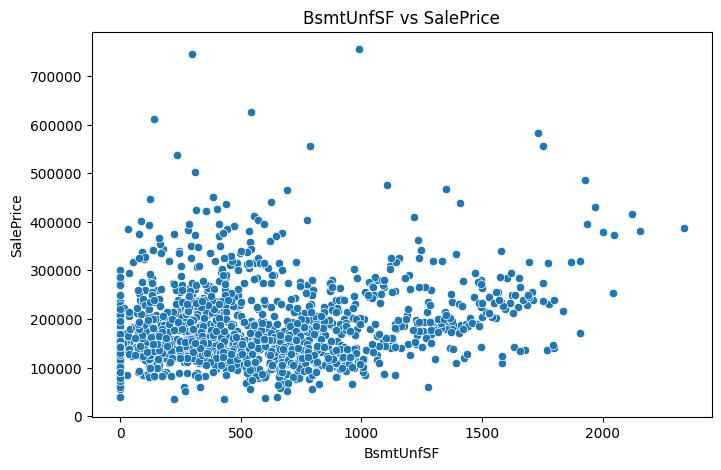

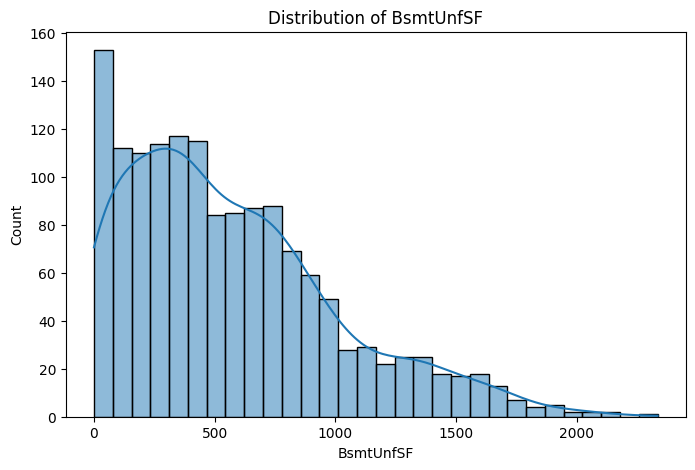

In [40]:
# Scatter plot (BsmtUnfSF vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='BsmtUnfSF', y='SalePrice')
plt.title("BsmtUnfSF vs SalePrice")
plt.show()

# Histogram of BsmtUnfSF
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='BsmtUnfSF', bins=30, kde=True)
plt.title("Distribution of BsmtUnfSF")
plt.show()



In [41]:
data.query('SalePrice>700000')

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
691    692          60       RL     4.653960  9.977481   Pave   NaN      IR1   
1182  1183          60       RL     5.081404  9.656563   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
691          Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1182         Lvl    AllPub    Corner       Gtl      NoRidge       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
691        Norm     1Fam     2Story           10            6       1994   
1182       Norm     1Fam     2Story           10            5       1996   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
691           1995     Gable  WdShngl     HdBoard     HdBoard    BrkFace   
1182          1996       Hip  CompShg     Wd Sdng     ImStucc        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
691       1170.0        Ex        TA      PConc       Ex       TA   
1182         0.0        Gd        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
691            Gd          GLQ        1455          Unf           0   
1182           Av          GLQ        2096          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
691         989         2444    GasA        Ex          Y      SBrkr   
1182        300         2396    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
691       2444      1872             0       4316             0             1   
1182      2411      2065             0       4476             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
691          3         1             4             1          Ex   
1182         3         1             4             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
691             10        Typ           2          Ex     Attchd       1994.0   
1182            10        Typ           2          TA     Attchd       1996.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
691           Fin           3         832         TA         TA          Y   
1182          Fin           3         813         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
691          382           50              0          0            0   
1182         171           78              0          0            0   

      PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
691          0    NaN    NaN         NaN        0       1    2007       WD   
1182       555     Ex  MnPrv         NaN        0       7    2007       WD   

     SaleCondition  SalePrice  
691         Normal     755000  
1182       Abnorml     745000

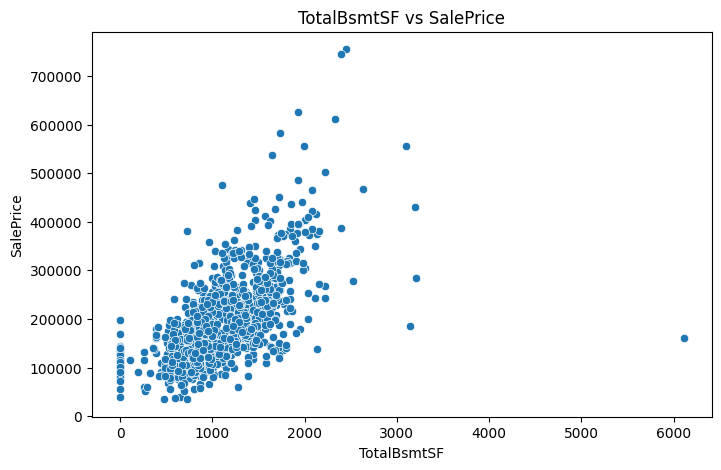

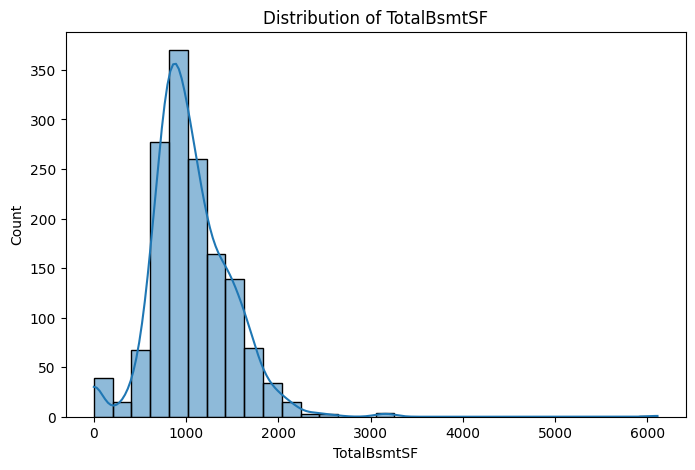

In [42]:
# Scatter plot (TotalBsmtSF vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='TotalBsmtSF', y='SalePrice')
plt.title("TotalBsmtSF vs SalePrice")
plt.show()

# Histogram of TotalBsmtSF
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='TotalBsmtSF', bins=30, kde=True)
plt.title("Distribution of TotalBsmtSF")
plt.show()


In [43]:
data.query('TotalBsmtSF>5000 ')

Id  MSSubClass MSZoning  LotFrontage    LotArea Street Alley LotShape  \
1298  1299          60       RL     5.749393  11.064887   Pave   NaN      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1298       Norm     1Fam     2Story           10            5       2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1298       796.0        Ex        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1298           Gd          GLQ        5644          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1298        466         6110    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1298      4692       950             0       5642             2             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1298         2         1             3             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1298            12        Typ           3          Gd     Attchd       2008.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1298          Fin           2        1418         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1298         214          292              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1298       480     Gd   NaN         NaN        0       1    2008      New   

     SaleCondition  SalePrice  
1298       Partial     160000

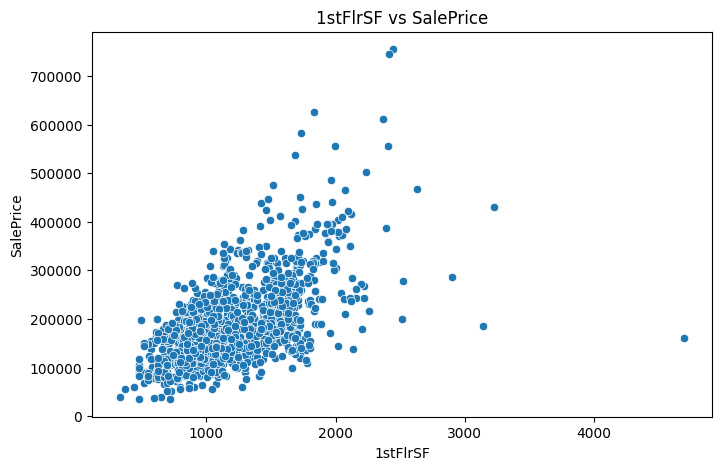

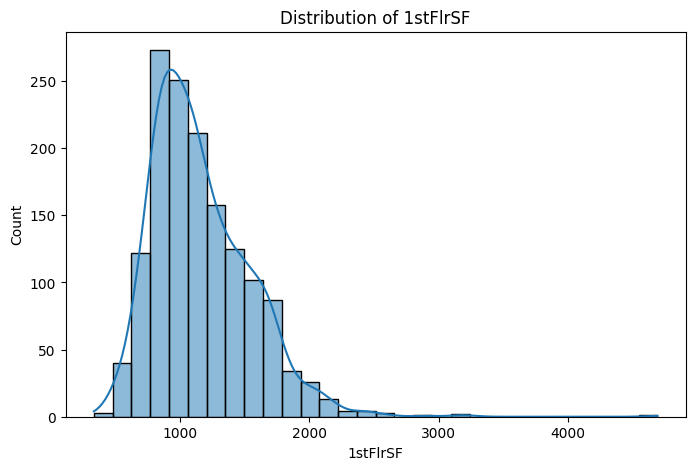

In [44]:
# Scatter plot (1stFlrSF vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='1stFlrSF', y='SalePrice')
plt.title("1stFlrSF vs SalePrice")
plt.show()

# Histogram of 1stFlrSF
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='1stFlrSF', bins=30, kde=True)
plt.title("Distribution of 1stFlrSF")
plt.show()


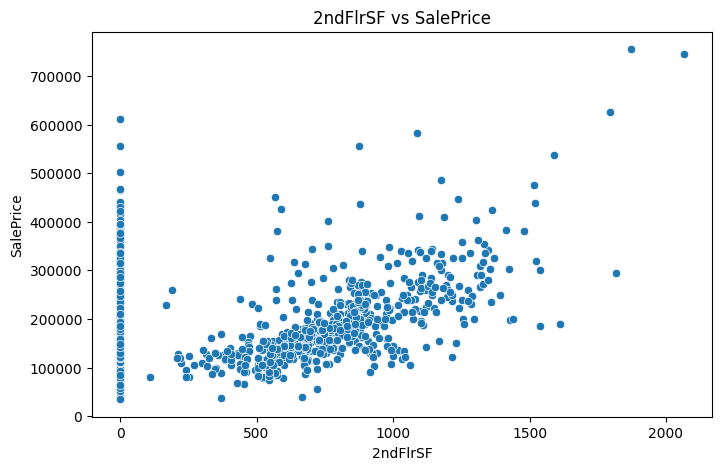

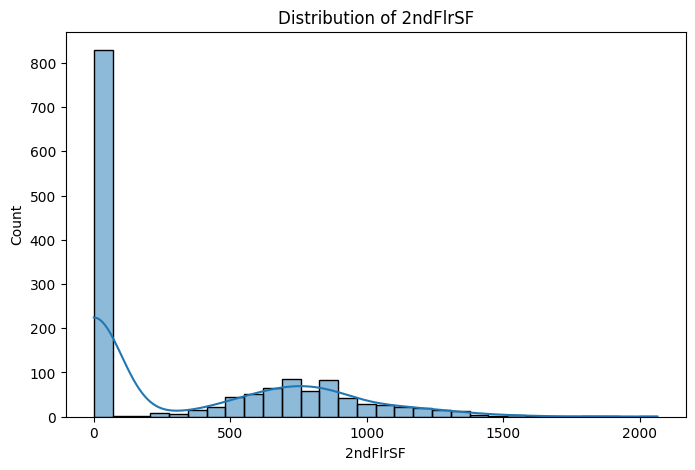

In [45]:
# Scatter plot (2ndFlrSF vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='2ndFlrSF', y='SalePrice')
plt.title("2ndFlrSF vs SalePrice")
plt.show()

# Histogram of 2ndFlrSF
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='2ndFlrSF', bins=30, kde=True)
plt.title("Distribution of 2ndFlrSF")
plt.show()



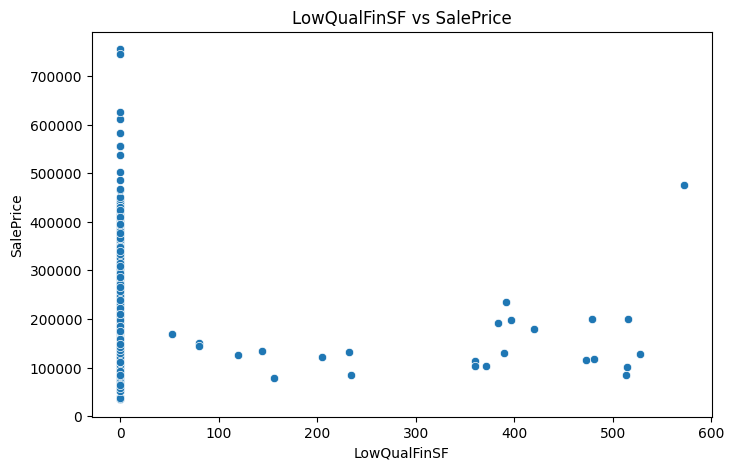

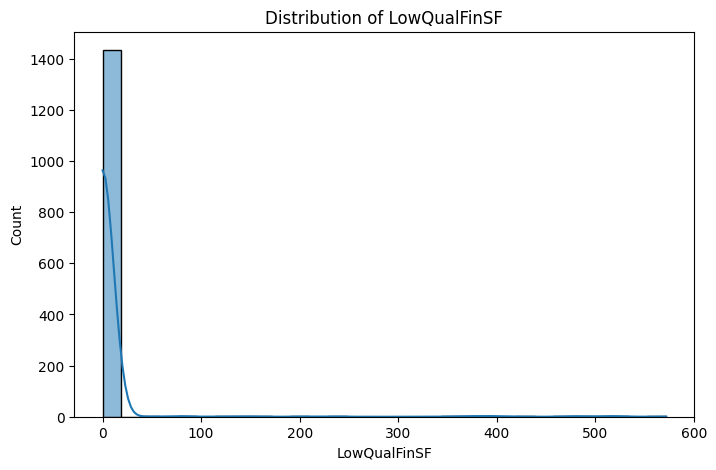

In [46]:
# Scatter plot (LowQualFinSF vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='LowQualFinSF', y='SalePrice')
plt.title("LowQualFinSF vs SalePrice")
plt.show()

# Histogram of LowQualFinSF
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='LowQualFinSF', bins=30, kde=True)
plt.title("Distribution of LowQualFinSF")
plt.show()


In [47]:
data.query('LowQualFinSF >500 & SalePrice>300000')

Id  MSSubClass MSZoning  LotFrontage    LotArea Street Alley LotShape  \
185  186          75       RM      4.51086  10.041117   Pave   NaN      IR2   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
185         Lvl    AllPub    Inside       Gtl      OldTown     Artery   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
185       Norm     1Fam     2.5Fin           10            9       1892   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
185          1993     Gable  WdShngl     Wd Sdng     Wd Sdng        NaN   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
185         0.0        Gd        Gd     BrkTil       TA       TA           Mn   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
185          Unf           0          Unf           0       1107         1107   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
185    GasA        Ex          Y      SBrkr      1518      1518           572   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
185       3608             0             0         2         1             4   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
185             1          Ex            12        Typ           2   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
185          TA     Detchd       1993.0          Unf           3         840   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
185         Ex         TA          Y           0          260              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  \
185          0          410         0    NaN  GdPrv         NaN        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  
185       6    2006       WD        Normal     475000

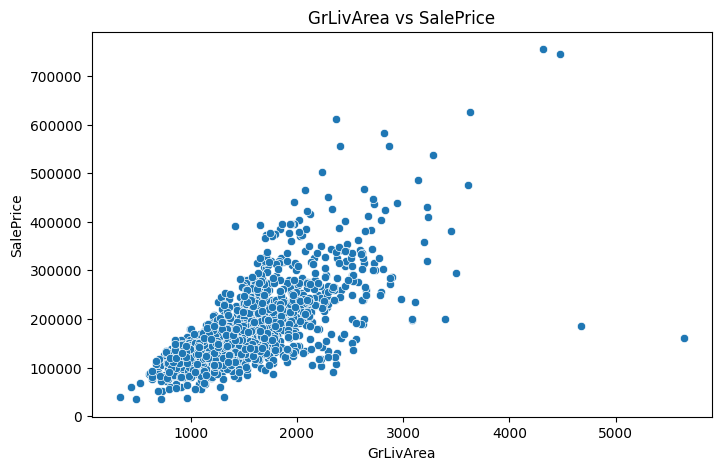

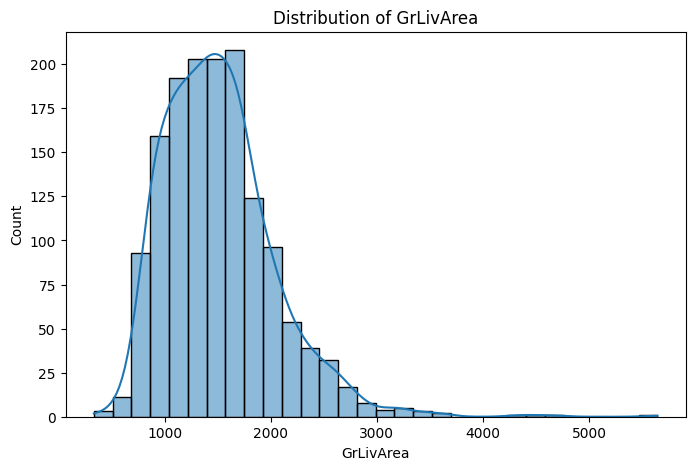

In [48]:
# Scatter plot (GrLivArea vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='GrLivArea', y='SalePrice')
plt.title("GrLivArea vs SalePrice")
plt.show()

# Histogram of GrLivArea
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='GrLivArea', bins=30, kde=True)
plt.title("Distribution of GrLivArea")
plt.show()


In [49]:
data.query('GrLivArea>4500')

Id  MSSubClass MSZoning  LotFrontage    LotArea Street Alley LotShape  \
523    524          60       RL     4.875197  10.599007   Pave   NaN      IR1   
1298  1299          60       RL     5.749393  11.064887   Pave   NaN      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
523          Bnk    AllPub    Inside       Gtl      Edwards       PosN   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
523        PosN     1Fam     2Story           10            5       2007   
1298       Norm     1Fam     2Story           10            5       2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
523           2008       Hip  CompShg     CemntBd     CmentBd      Stone   
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
523        762.0        Ex        TA      PConc       Ex       TA   
1298       796.0        Ex        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
523            Gd          GLQ        2260          Unf           0   
1298           Gd          GLQ        5644          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
523         878         3138    GasA        Ex          Y      SBrkr   
1298        466         6110    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
523       3138      1538             0       4676             1             0   
1298      4692       950             0       5642             2             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
523          3         1             3             1          Ex   
1298         2         1             3             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
523             11        Typ           1          Gd    BuiltIn       2007.0   
1298            12        Typ           3          Gd     Attchd       2008.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
523           Fin           3         884         TA         TA          Y   
1298          Fin           2        1418         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
523          208          406              0          0            0   
1298         214          292              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
523          0    NaN   NaN         NaN        0      10    2007      New   
1298       480     Gd   NaN         NaN        0       1    2008      New   

     SaleCondition  SalePrice  
523        Partial     184750  
1298       Partial     160000

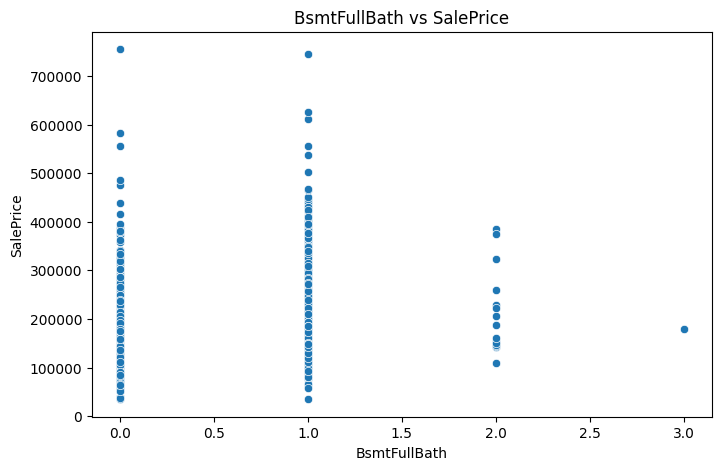

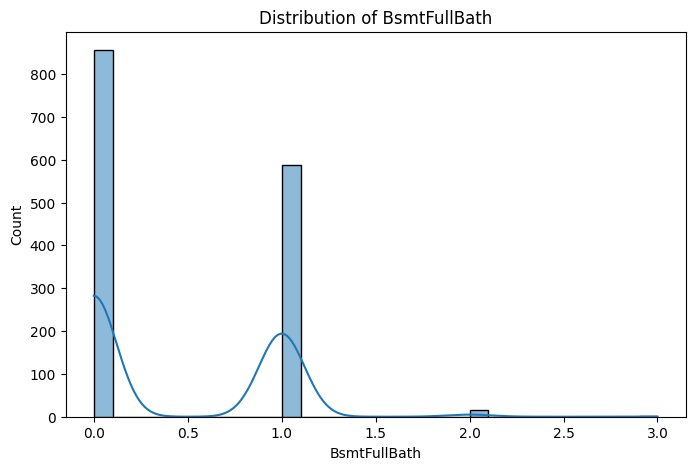

In [50]:
# Scatter plot (BsmtFullBath vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='BsmtFullBath', y='SalePrice')
plt.title("BsmtFullBath vs SalePrice")
plt.show()
# Histogram of BsmtFullBath
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='BsmtFullBath', bins=30, kde=True)
plt.title("Distribution of BsmtFullBath")
plt.show()


In [51]:
data.query('BsmtFullBath>2')

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
738  739          90       RL     4.110874  9.287394   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
738         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
738       Norm   Duplex     1Story            5            5       1987   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
738          1988     Gable  CompShg     Plywood     Plywood        NaN   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
738         0.0        TA        TA     CBlock       Gd       Gd           Gd   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
738          GLQ        1200          Unf           0          0         1200   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
738    GasA        TA          Y      SBrkr      1200         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
738       1200             3             0         3         0             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
738             1          TA             5        Typ           0   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
738         NaN        NaN          NaN          NaN           0           0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
738        NaN        NaN          Y         120            0              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
738          0            0         0    NaN   NaN         NaN        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  
738       3    2009       WD        Alloca     179000

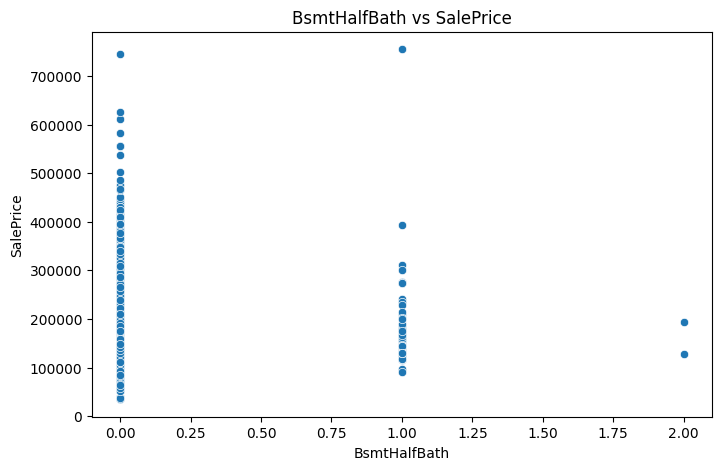

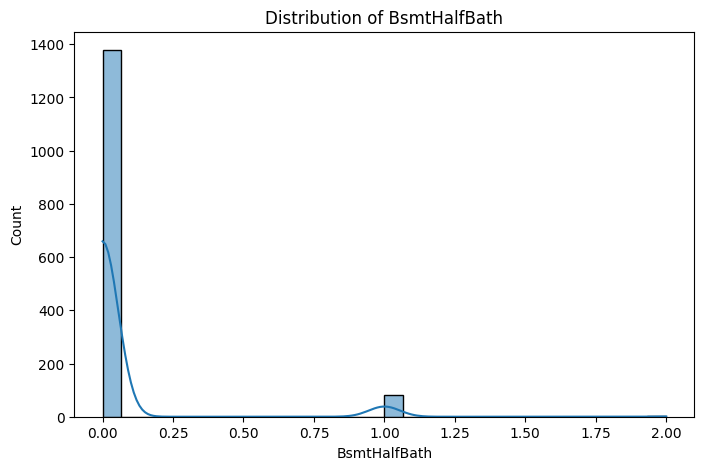

In [52]:
# Scatter plot (BsmtHalfBath vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='BsmtHalfBath', y='SalePrice')
plt.title("BsmtHalfBath vs SalePrice")
plt.show()
# Histogram of BsmtHalfBath
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='BsmtHalfBath', bins=30, kde=True)
plt.title("Distribution of BsmtHalfBath")
plt.show()


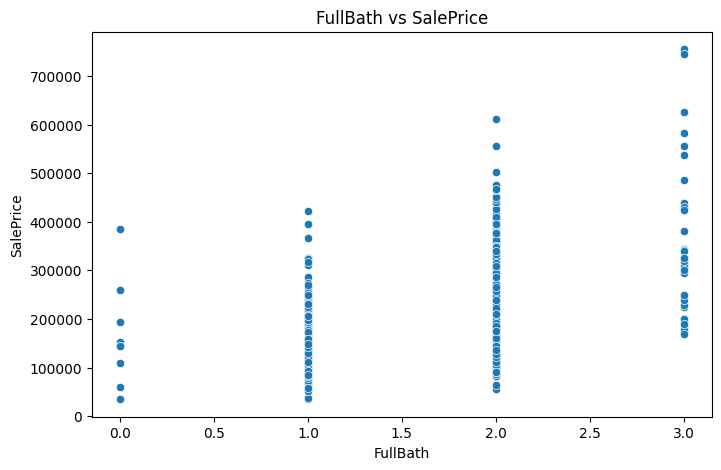

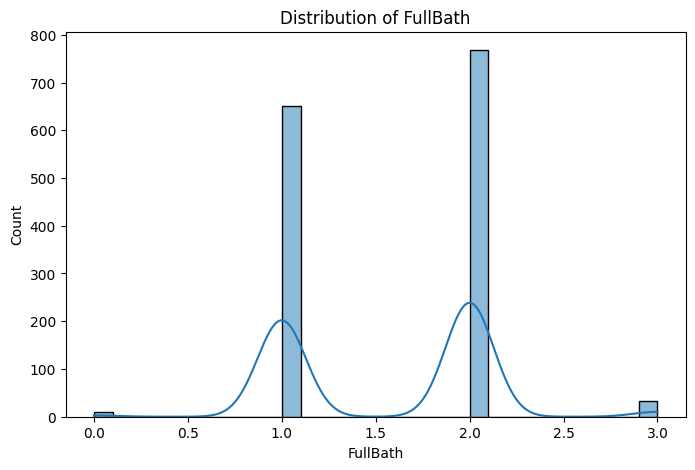

In [53]:
# Scatter plot (FullBath vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='FullBath', y='SalePrice')
plt.title("FullBath vs SalePrice")
plt.show()
# Histogram of FullBath
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='FullBath', bins=30, kde=True)
plt.title("Distribution of FullBath")
plt.show()


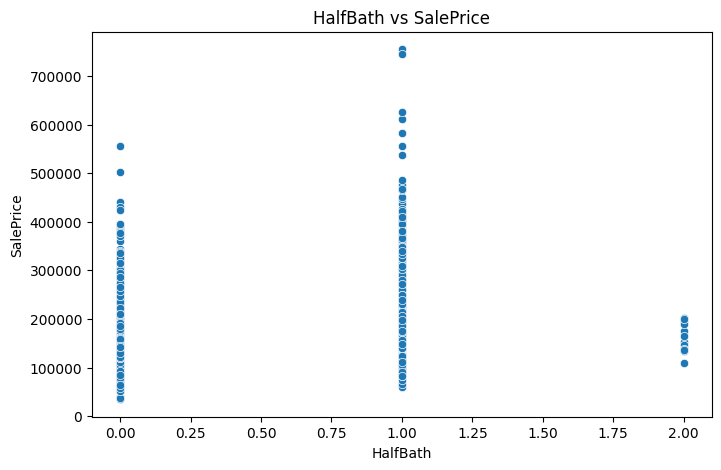

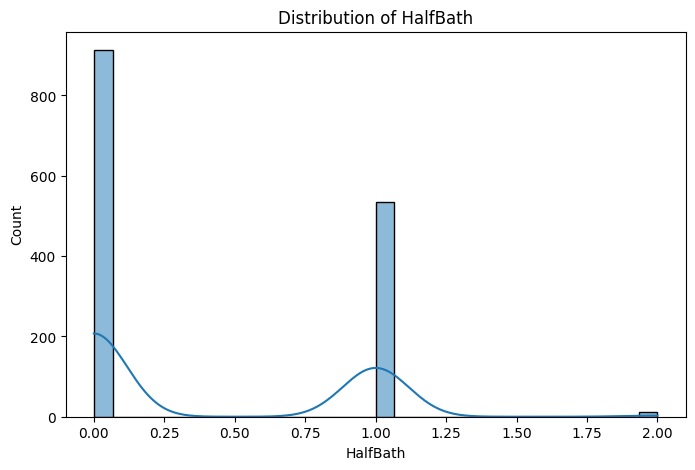

In [54]:
# Scatter plot (HalfBath vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='HalfBath', y='SalePrice')
plt.title("HalfBath vs SalePrice")
plt.show()
# Histogram of HalfBath
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='HalfBath', bins=30, kde=True)
plt.title("Distribution of HalfBath")
plt.show()


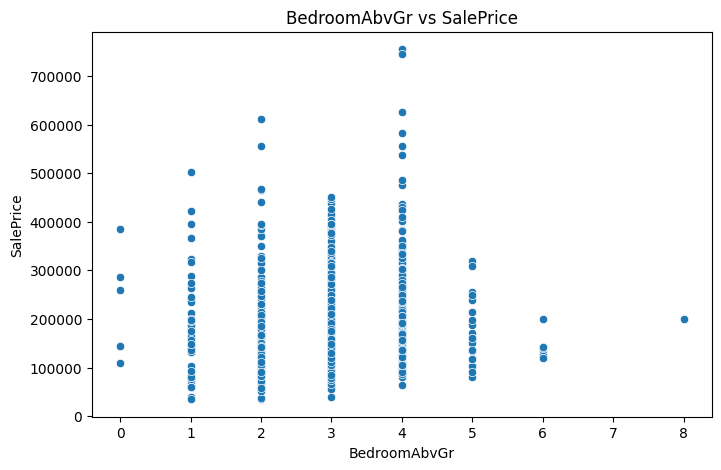

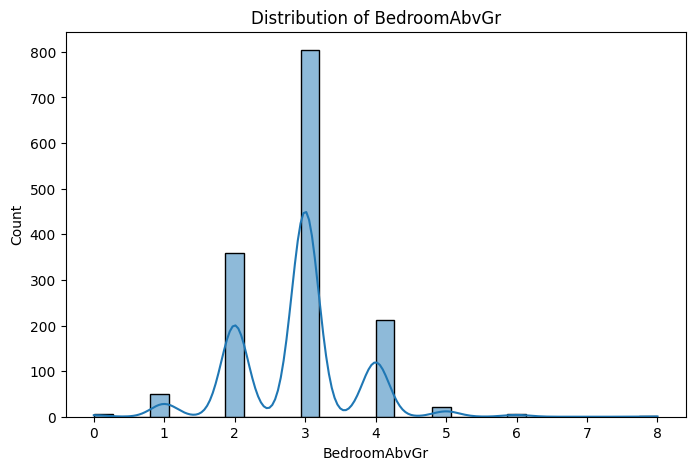

In [55]:
# Scatter plot (BedroomAbvG vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='BedroomAbvGr', y='SalePrice')
plt.title("BedroomAbvGr vs SalePrice")
plt.show()
# Histogram of BedroomAbvG
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='BedroomAbvGr', bins=30, kde=True)
plt.title("Distribution of BedroomAbvGr")
plt.show()


In [56]:
data.query('BedroomAbvGr==8')

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
635  636         190       RH     4.110874  9.296243   Pave  Pave      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
635         Bnk    AllPub    Inside       Gtl        SWISU      Feedr   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
635       Norm   2fmCon     2.5Fin            6            7       1914   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
635          1995       Hip  CompShg     VinylSd     VinylSd        NaN   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
635         0.0        Fa        TA     CBlock       TA       Fa           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
635          LwQ         256          Unf           0       1184         1440   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
635    GasA        Ex          Y      FuseA      1440      1440           515   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
635       3395             0             0         2         0             8   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
635             2          Fa            14        Typ           0   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
635         NaN        NaN          NaN          NaN           0           0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
635        NaN        NaN          N           0          110              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
635          0            0         0    NaN   NaN         NaN        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  
635       3    2007       WD       Abnorml     200000

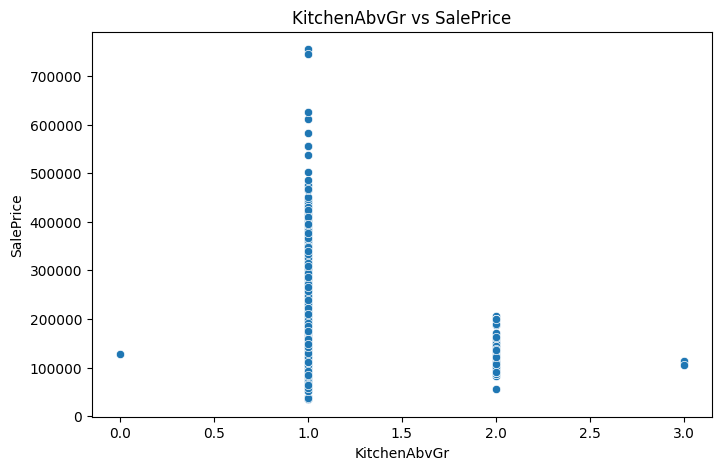

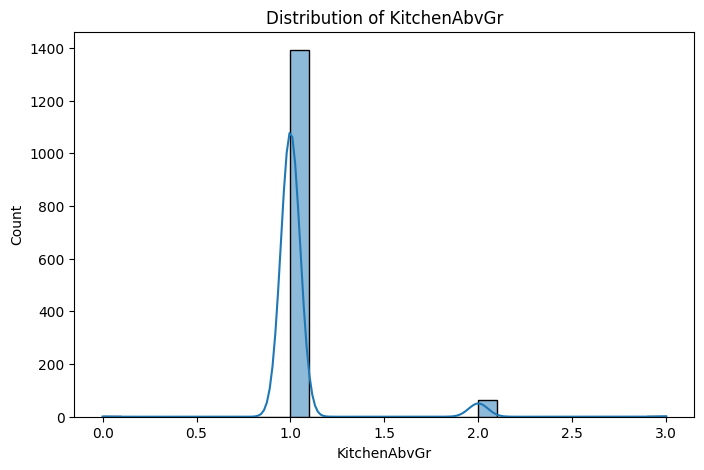

In [57]:
# Scatter plot (KitchenAbvGr vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='KitchenAbvGr', y='SalePrice')
plt.title("KitchenAbvGr vs SalePrice")
plt.show()
# Histogram of KitchenAbvGr
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='KitchenAbvGr', bins=30, kde=True)
plt.title("Distribution of KitchenAbvGr")
plt.show()



In [58]:
data.query('KitchenAbvGr==3')

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
48    49         190       RM     3.526361  8.402231   Pave   NaN      Reg   
809  810          75       RM     4.510860  8.999743   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
48          Lvl    AllPub    Inside       Gtl      OldTown       Norm   
809         Lvl    AllPub    Corner       Gtl      OldTown       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
48        Norm   2fmCon     2Story            4            5       1920   
809       Norm     1Fam     2.5Unf            5            5       1898   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
48           2008     Gable  CompShg     MetalSd     MetalSd        NaN   
809          1965       Hip  CompShg     AsbShng     AsbShng        NaN   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
48          0.0        TA        TA     BrkTil       TA       TA           No   
809         0.0        TA        TA      PConc       TA       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
48           Unf           0          Unf           0        736          736   
809          Unf           0          Unf           0        849          849   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
48     GasA        Gd          Y      SBrkr       736       716             0   
809    GasA        TA          N      FuseA      1075      1063             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
48        1452             0             0         2         0             2   
809       2138             0             0         2         0             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
48              3          TA             8        Typ           0   
809             3          TA            11        Typ           0   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
48          NaN        NaN          NaN          NaN           0           0   
809         NaN     Detchd       1910.0          Unf           2         360   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
48         NaN        NaN          N           0            0            102   
809         Fa         Po          N          40          156              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  \
48           0            0         0    NaN    NaN         NaN        0   
809          0            0         0    NaN  MnPrv         NaN        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  
48        6    2009      New       Partial     113000  
809      11    2009       WD        Normal     106000

In [59]:
data.query('KitchenAbvGr==0')

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
954  955          90       RL     3.583519  9.148571   Pave   NaN      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
954         Lvl    AllPub   CulDSac       Gtl      Edwards       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
954       Norm   Duplex     SFoyer            6            5       1975   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
954          1975      Flat  Tar&Grv     WdShing     Plywood    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
954       250.0        TA        TA     CBlock       Gd       Gd           Gd   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
954          GLQ         945          Unf           0          0          945   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
954    GasA        TA          Y      SBrkr       980         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
954        980             0             2         2         0             4   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
954             0          TA             4        Typ           0   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
954         NaN        NaN          NaN          NaN           0           0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
954        NaN        NaN          Y           0            0              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
954          0            0         0    NaN   NaN         NaN        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  
954      10    2006       WD       AdjLand     127500

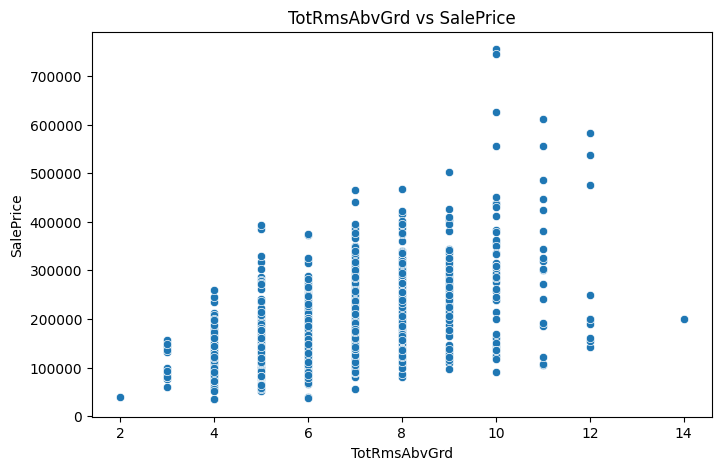

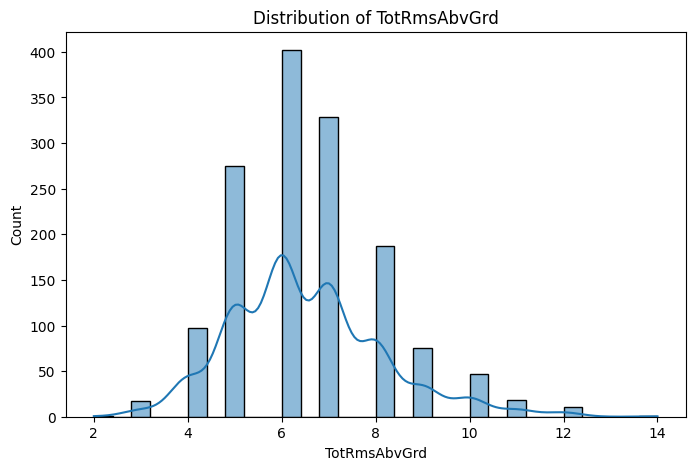

In [60]:
# Scatter plot (TotRmsAbvGrd vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='TotRmsAbvGrd', y='SalePrice')
plt.title("TotRmsAbvGrd vs SalePrice")
plt.show()
# Histogram of TotRmsAbvGrd
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='TotRmsAbvGrd', bins=30, kde=True)
plt.title("Distribution of TotRmsAbvGrd")
plt.show()


In [61]:
data.query('TotRmsAbvGrd==14')

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
635  636         190       RH     4.110874  9.296243   Pave  Pave      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
635         Bnk    AllPub    Inside       Gtl        SWISU      Feedr   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
635       Norm   2fmCon     2.5Fin            6            7       1914   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
635          1995       Hip  CompShg     VinylSd     VinylSd        NaN   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
635         0.0        Fa        TA     CBlock       TA       Fa           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
635          LwQ         256          Unf           0       1184         1440   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
635    GasA        Ex          Y      FuseA      1440      1440           515   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
635       3395             0             0         2         0             8   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
635             2          Fa            14        Typ           0   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
635         NaN        NaN          NaN          NaN           0           0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
635        NaN        NaN          N           0          110              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
635          0            0         0    NaN   NaN         NaN        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  
635       3    2007       WD       Abnorml     200000

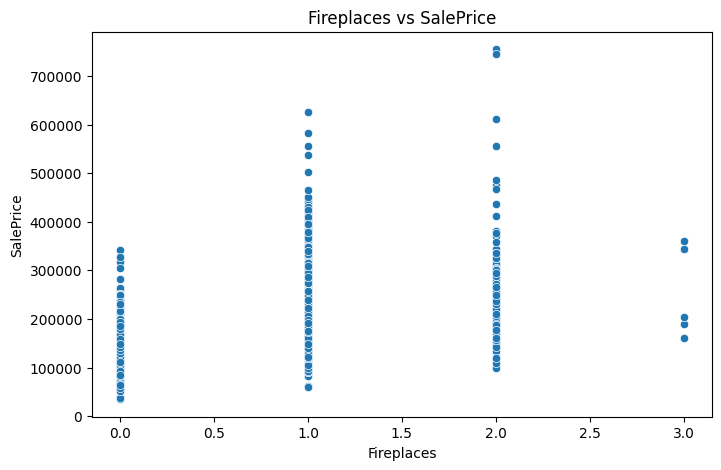

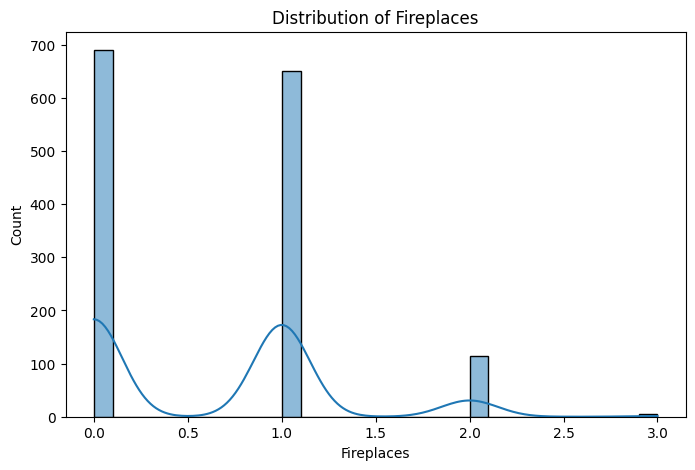

In [62]:
# Scatter plot (Fireplaces vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='Fireplaces', y='SalePrice')
plt.title("Fireplaces vs SalePrice")
plt.show()
# Histogram of Fireplaces
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='Fireplaces', bins=30, kde=True)
plt.title("Distribution of Fireplaces")
plt.show()


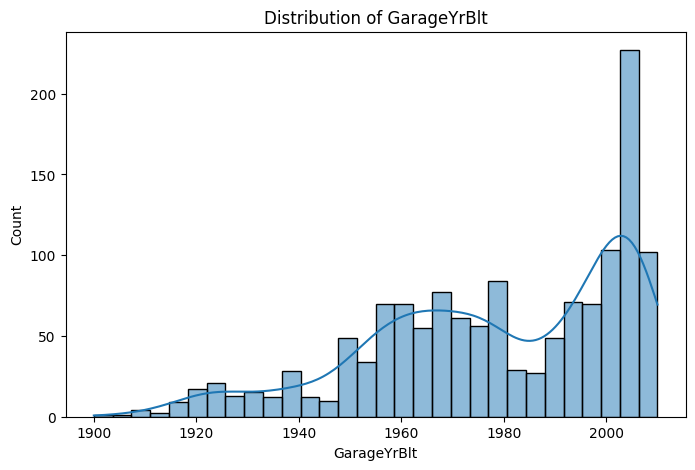

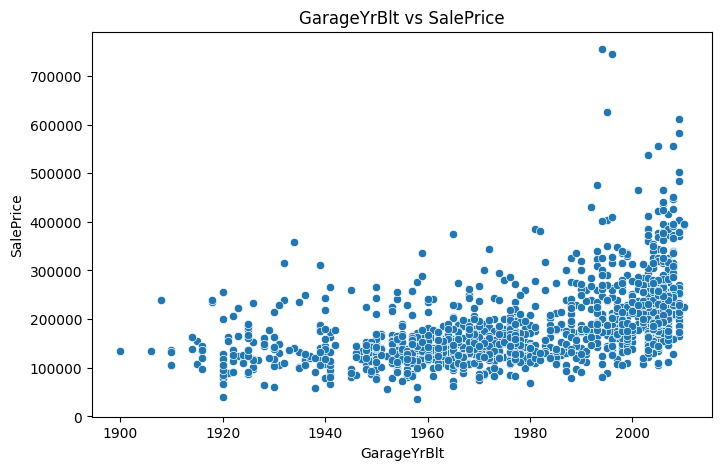

In [63]:
# Histogram of GarageYrBlt
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='GarageYrBlt', bins=30, kde=True)
plt.title("Distribution of GarageYrBlt")
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot (GarageYrBlt vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='GarageYrBlt', y='SalePrice')
plt.title("GarageYrBlt vs SalePrice")
plt.show()


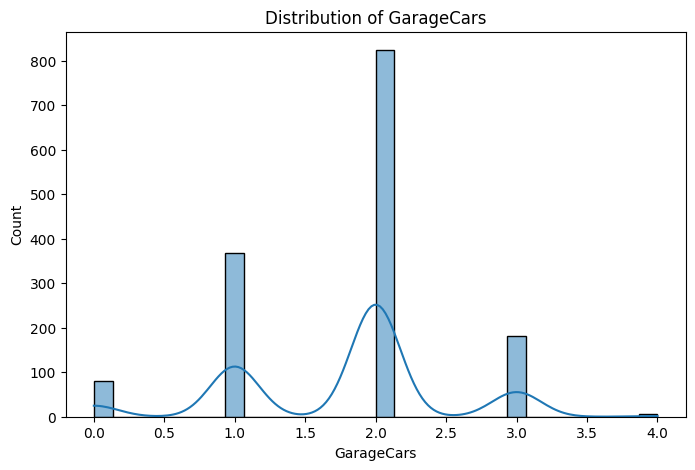

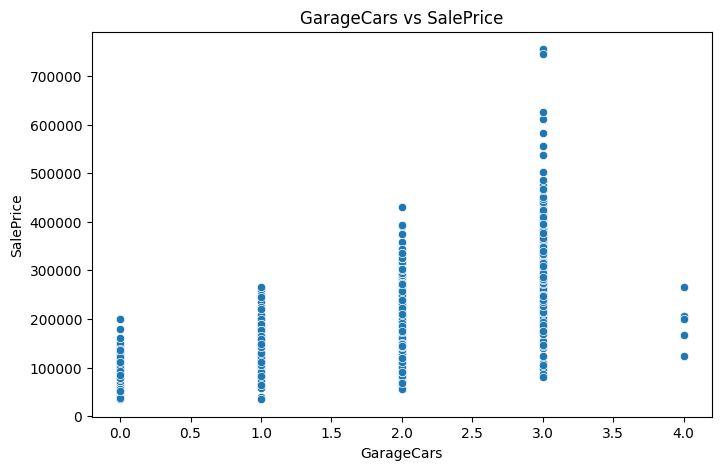

In [64]:
# Histogram of GarageCars
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='GarageCars', bins=30, kde=True)
plt.title("Distribution of GarageCars")
plt.show()

# Scatter plot (GarageCars vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='GarageCars', y='SalePrice')
plt.title("GarageCars vs SalePrice")
plt.show()


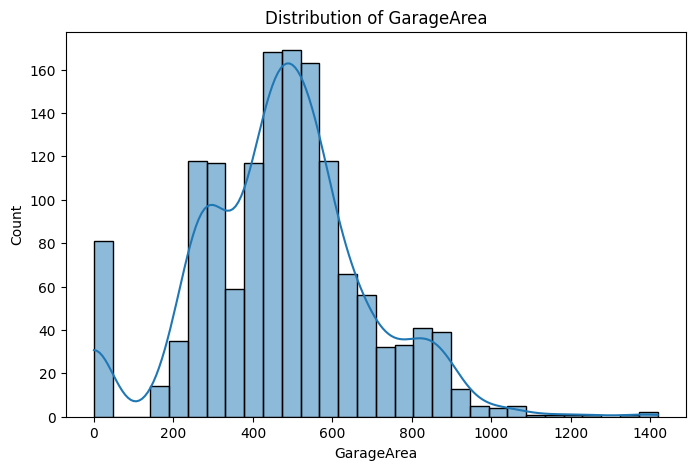

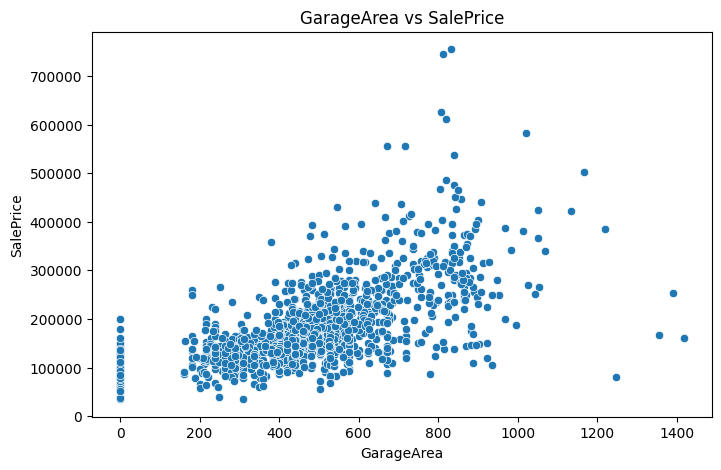

In [65]:
# Histogram of GarageArea
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='GarageArea', bins=30, kde=True)
plt.title("Distribution of GarageArea")
plt.show()


# Scatter plot (GarageArea vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='GarageArea', y='SalePrice')
plt.title("GarageArea vs SalePrice")
plt.show()


In [66]:
data.query('GarageArea>1300')

Id  MSSubClass MSZoning  LotFrontage    LotArea Street Alley LotShape  \
581    582          20       RL     4.595120   9.449751   Pave   NaN      Reg   
1190  1191         190       RL          NaN  10.387887   Pave   NaN      Reg   
1298  1299          60       RL     5.749393  11.064887   Pave   NaN      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
581          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
1190         Low    AllPub    Inside       Mod      Mitchel       Norm   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
581        Norm     1Fam     1Story            8            5       2008   
1190       Norm   2fmCon     1Story            4            4       1961   
1298       Norm     1Fam     2Story           10            5       2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
581           2009       Hip  CompShg     VinylSd     VinylSd    BrkFace   
1190          1975     Gable  CompShg     MetalSd     MetalSd      Stone   
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
581        306.0        Ex        TA      PConc       Ex       TA   
1190       149.0        TA        Gd     CBlock       TA       TA   
1298       796.0        Ex        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
581            No          Unf           0          Unf           0   
1190           Av          BLQ        1159          Unf           0   
1298           Gd          GLQ        5644          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
581        2042         2042    GasA        Ex          Y      SBrkr   
1190         90         1249    GasA        Ex          Y      SBrkr   
1298        466         6110    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
581       2042         0             0       2042             0             0   
1190      1622         0             0       1622             1             0   
1298      4692       950             0       5642             2             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
581          2         1             3             1          Ex   
1190         1         0             3             1          TA   
1298         2         1             3             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
581              8        Typ           1          Gd     Attchd       2009.0   
1190             7        Typ           1          TA     2Types       1975.0   
1298            12        Typ           3          Gd     Attchd       2008.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
581           RFn           3        1390         TA         TA          Y   
1190          Fin           4        1356         TA         TA          Y   
1298          Fin           2        1418         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
581            0           90              0          0            0   
1190         439            0              0          0            0   
1298         214          292              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
581          0    NaN   NaN         NaN        0       8    2009      New   
1190         0    NaN   NaN         NaN        0       3    2007       WD   
1298       480     Gd   NaN         NaN        0       1    2008      New   

     SaleCondition  SalePrice  
581        Partial     253293  
1190        Normal     1680

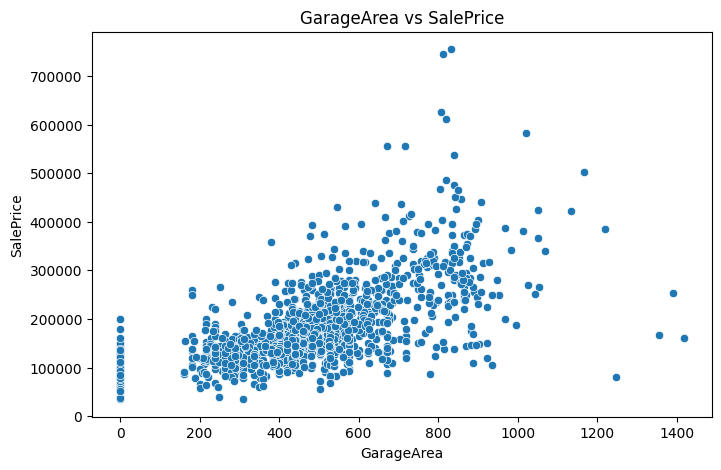

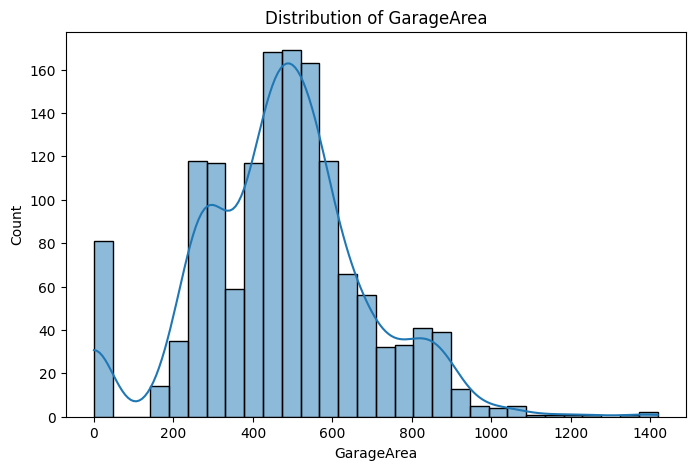

In [67]:
# Scatter plot (GarageArea vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='GarageArea', y='SalePrice')
plt.title("GarageArea vs SalePrice")
plt.show()
# Histogram of GarageArea
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='GarageArea', bins=30, kde=True)
plt.title("Distribution of GarageArea")
plt.show()


In [68]:
data.query('GarageArea>1300')

Id  MSSubClass MSZoning  LotFrontage    LotArea Street Alley LotShape  \
581    582          20       RL     4.595120   9.449751   Pave   NaN      Reg   
1190  1191         190       RL          NaN  10.387887   Pave   NaN      Reg   
1298  1299          60       RL     5.749393  11.064887   Pave   NaN      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
581          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
1190         Low    AllPub    Inside       Mod      Mitchel       Norm   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
581        Norm     1Fam     1Story            8            5       2008   
1190       Norm   2fmCon     1Story            4            4       1961   
1298       Norm     1Fam     2Story           10            5       2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
581           2009       Hip  CompShg     VinylSd     VinylSd    BrkFace   
1190          1975     Gable  CompShg     MetalSd     MetalSd      Stone   
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
581        306.0        Ex        TA      PConc       Ex       TA   
1190       149.0        TA        Gd     CBlock       TA       TA   
1298       796.0        Ex        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
581            No          Unf           0          Unf           0   
1190           Av          BLQ        1159          Unf           0   
1298           Gd          GLQ        5644          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
581        2042         2042    GasA        Ex          Y      SBrkr   
1190         90         1249    GasA        Ex          Y      SBrkr   
1298        466         6110    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
581       2042         0             0       2042             0             0   
1190      1622         0             0       1622             1             0   
1298      4692       950             0       5642             2             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
581          2         1             3             1          Ex   
1190         1         0             3             1          TA   
1298         2         1             3             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
581              8        Typ           1          Gd     Attchd       2009.0   
1190             7        Typ           1          TA     2Types       1975.0   
1298            12        Typ           3          Gd     Attchd       2008.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
581           RFn           3        1390         TA         TA          Y   
1190          Fin           4        1356         TA         TA          Y   
1298          Fin           2        1418         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
581            0           90              0          0            0   
1190         439            0              0          0            0   
1298         214          292              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
581          0    NaN   NaN         NaN        0       8    2009      New   
1190         0    NaN   NaN         NaN        0       3    2007       WD   
1298       480     Gd   NaN         NaN        0       1    2008      New   

     SaleCondition  SalePrice  
581        Partial     253293  
1190        Normal     1680

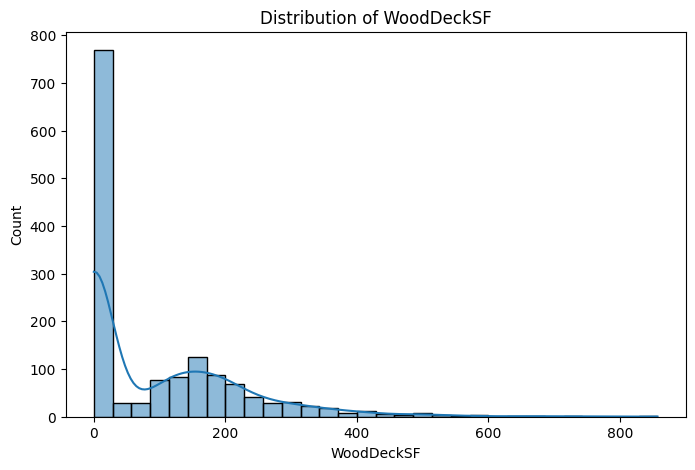

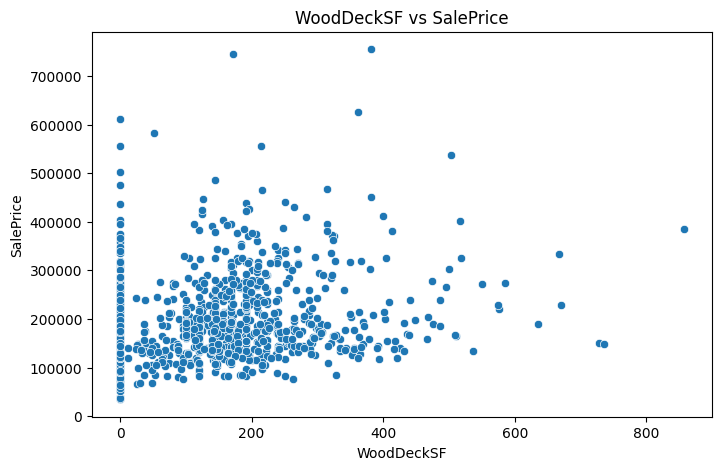

In [69]:
# Histogram of WoodDeckSF
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='WoodDeckSF', bins=30, kde=True)
plt.title("Distribution of WoodDeckSF")
plt.show()


# Scatter plot (WoodDeckSF vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='WoodDeckSF', y='SalePrice')
plt.title("WoodDeckSF vs SalePrice")
plt.show()


In [70]:
data.query('WoodDeckSF>800')

Id  MSSubClass MSZoning  LotFrontage    LotArea Street Alley LotShape  \
53  54          20       RL     4.234107  10.825204   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
53         Low    AllPub    Inside       Gtl      Veenker       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
53       Norm     1Fam     1Story            9            5       1981   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
53          1987     Gable  WdShngl     WdShing     Wd Shng        NaN   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
53         0.0        Gd        TA     CBlock       Ex       TA           Gd   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
53          GLQ        1810          Unf           0         32         1842   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
53    GasA        Gd          Y      SBrkr      1842         0             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
53       1842             2             0         0         1             0   

    KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
53             1          Gd             5        Typ           1          Gd   

   GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
53     Attchd       1981.0          Fin           3         894         TA   

   GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
53         TA          Y         857           72              0          0   

    ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
53            0         0    NaN   NaN         NaN        0      11    2006   

   SaleType SaleCondition  SalePrice  
53       WD        Normal     385000

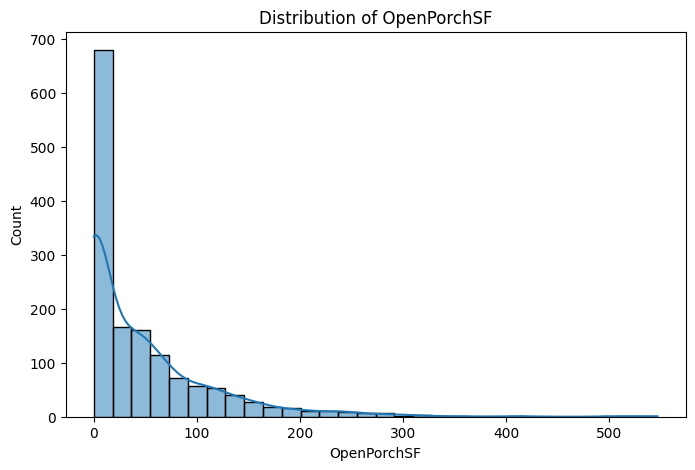

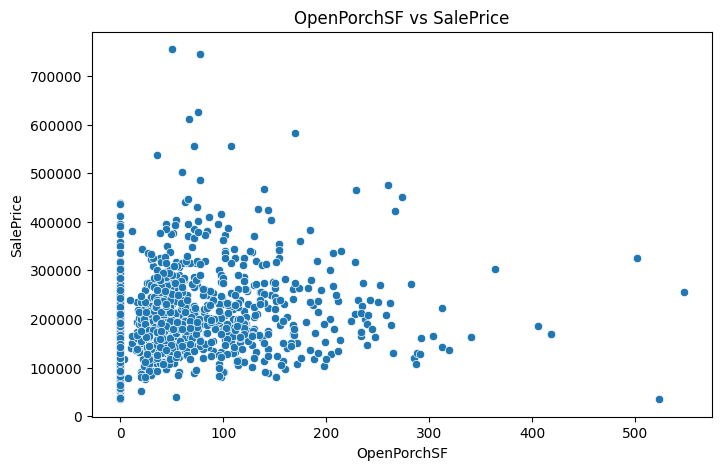

In [71]:
# Histogram of OpenPorchSF
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='OpenPorchSF', bins=30, kde=True)
plt.title("Distribution of OpenPorchSF")
plt.show()
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='OpenPorchSF', y='SalePrice')
plt.title("OpenPorchSF vs SalePrice")
plt.show()

In [72]:
data.query('OpenPorchSF>500')

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
495    496          30  C (all)     4.110874  8.972083   Pave   NaN      Reg   
583    584          75       RM     4.330733  9.510519   Pave   NaN      Reg   
1328  1329          50       RM     4.110874  9.253496   Pave  Grvl      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
495          Lvl    AllPub    Inside       Gtl       IDOTRR       Norm   
583          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
1328         Lvl    AllPub    Corner       Gtl      OldTown       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
495        Norm     1Fam     1Story            4            5       1920   
583        PosA     1Fam     2.5Unf           10            9       1893   
1328       Norm     1Fam     1.5Fin            6            7       1920   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
495           1950     Gable  CompShg     Wd Sdng     Wd Sdng        NaN   
583           2000     Gable  CompShg     Wd Sdng     Wd Sdng        NaN   
1328          1950     Gable  CompShg     BrkFace     Wd Sdng        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
495          0.0        TA        TA     CBlock       TA       TA   
583          0.0        Ex        Ex     BrkTil       TA       TA   
1328         0.0        Gd        Gd     BrkTil       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
495            No          Rec         495          Unf           0   
583            No          Unf           0          Unf           0   
1328           No          LwQ         493          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
495         225          720    GasA        TA          N      FuseA   
583        1237         1237    GasA        Gd          Y      SBrkr   
1328       1017         1510    GasW        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
495        720         0             0        720             0             0   
583       1521      1254             0       2775             0             0   
1328      1584      1208             0       2792             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
495          1         0             2             1          TA   
583          3         1             3             1          Gd   
1328         2         0             5             1          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
495              4        Typ           0         NaN        NaN          NaN   
583              9        Typ           1          Gd     Detchd       1988.0   
1328             8        Mod           2          TA     Detchd       1920.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
495           NaN           0           0        NaN        NaN          N   
583           Unf           2         880         Gd         TA          Y   
1328          Unf           2         520         Fa         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
495            0          523            115          0            0   
583          105          502              0          0            0   
1328           0          547              0          0          480   

      PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
495          0    NaN   GdWo         NaN        0      11    2009       WD   
583          0    NaN    NaN         NaN        0       7    2008       WD   
1328         0    NaN  MnPrv        Shed     1150       6    2008       WD   

     SaleCondition  SalePrice  
495        Abnorml      34900  
583         Normal     3250

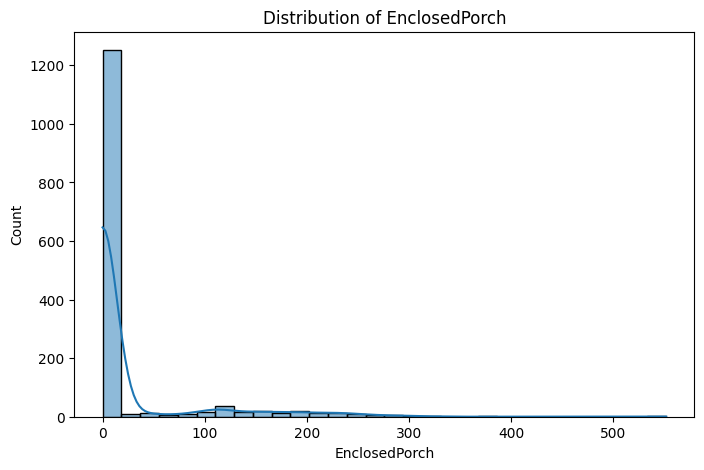

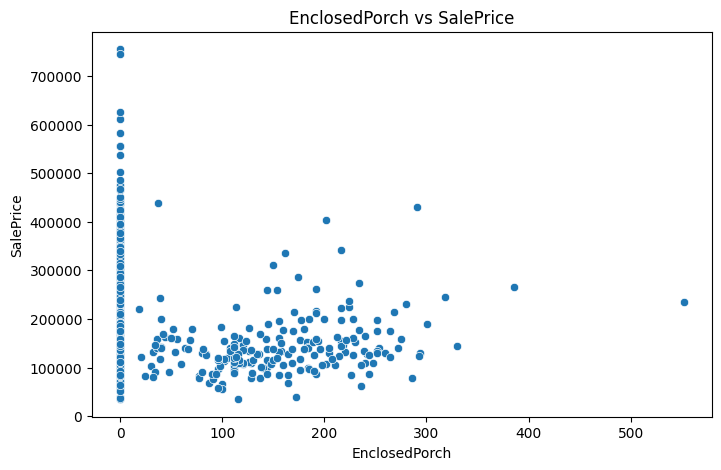

In [73]:
# Histogram of EnclosedPorch
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='EnclosedPorch', bins=30, kde=True)
plt.title("Distribution of EnclosedPorch")
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot (EnclosedPorch vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='EnclosedPorch', y='SalePrice')
plt.title("EnclosedPorch vs SalePrice")
plt.show()


In [74]:
data.query('EnclosedPorch>500')

Id  MSSubClass MSZoning  LotFrontage    LotArea Street Alley LotShape  \
197  198          75       RL     5.164786  10.143292   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
197         Lvl    AllPub    Corner       Gtl        NAmes     Artery   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
197       Norm     1Fam     2Story            8            4       1918   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
197          1990     Gable  CompShg      Stucco      Stucco        NaN   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
197         0.0        Gd        Gd      PConc       TA       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
197          GLQ        1036          LwQ         184        140         1360   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
197    GasA        Gd          Y      SBrkr      1360      1360           392   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
197       3112             1             1         2         0             4   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
197             1          Gd             8        Typ           1   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
197          Ex     Detchd       1918.0          Unf           2         795   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
197         TA         TA          Y           0           16            552   

     3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  \
197          0            0       512     Ex  GdPrv         NaN        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  
197       3    2006       WD       Abnorml     235000

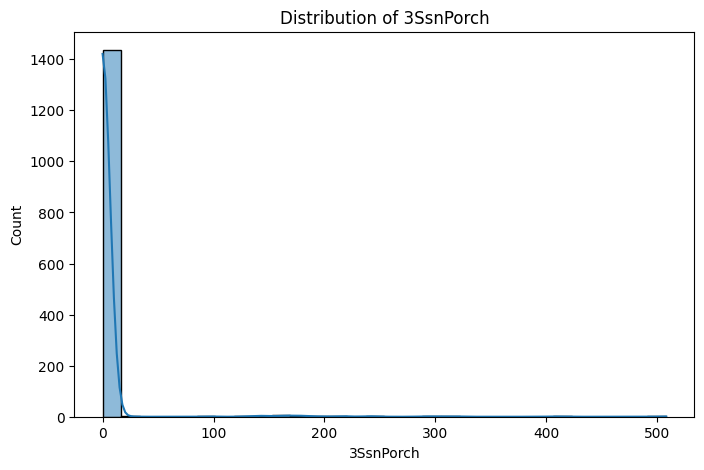

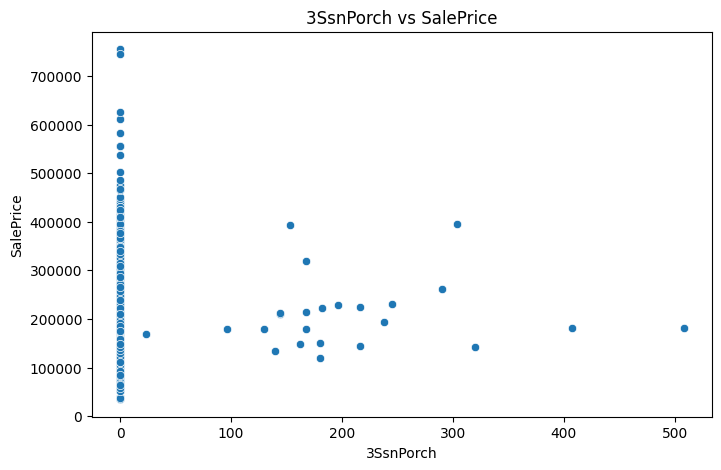

In [75]:
# Histogram of 3SsnPorch
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='3SsnPorch', bins=30, kde=True)
plt.title("Distribution of 3SsnPorch")
plt.show()


# Scatter plot (3SsnPorch vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='3SsnPorch', y='SalePrice')
plt.title("3SsnPorch vs SalePrice")
plt.show()


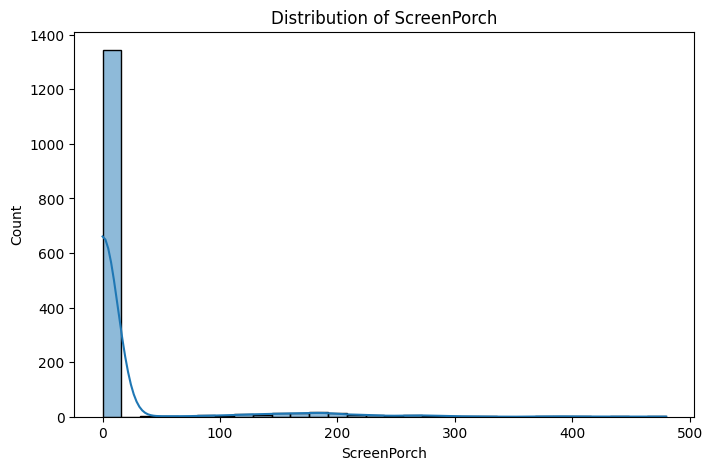

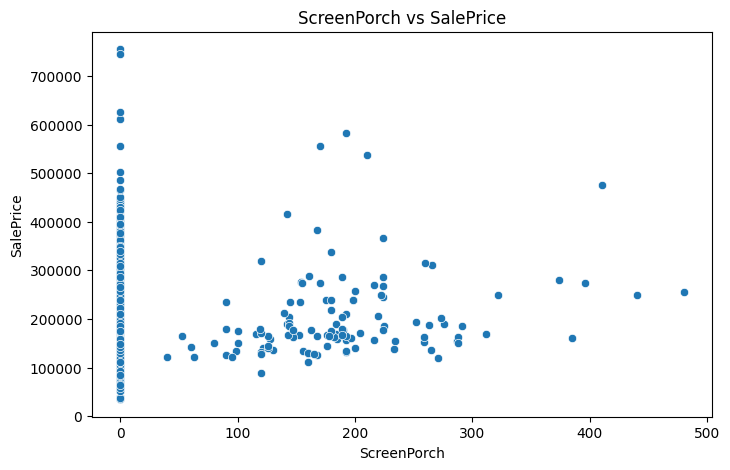

In [76]:
# Histogram of ScreenPorch
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='ScreenPorch', bins=30, kde=True)
plt.title("Distribution of ScreenPorch")
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot (ScreenPorch vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='ScreenPorch', y='SalePrice')
plt.title("ScreenPorch vs SalePrice")
plt.show()


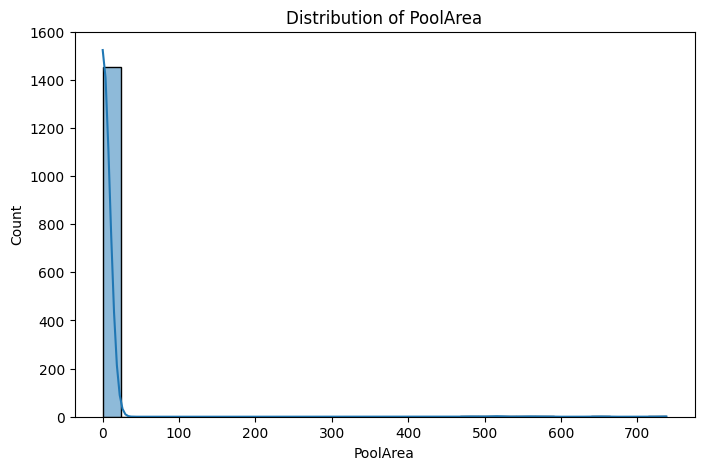

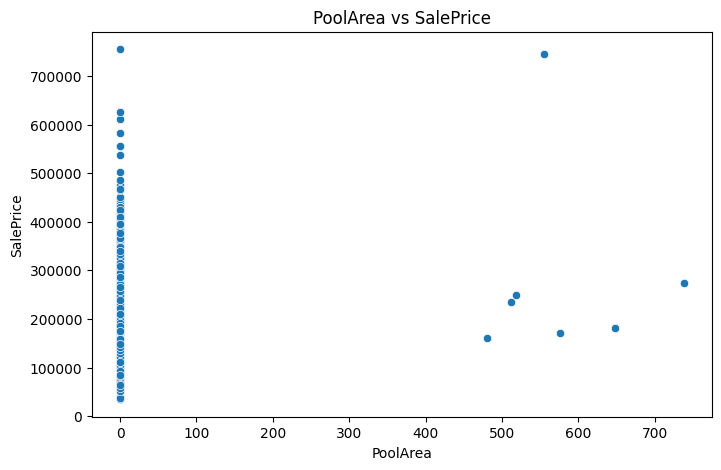

In [77]:
# Histogram of PoolArea
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='PoolArea', bins=30, kde=True)
plt.title("Distribution of PoolArea")
plt.show()

# Scatter plot (PoolArea vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='PoolArea', y='SalePrice')
plt.title("PoolArea vs SalePrice")
plt.show()


In [78]:
data.query('PoolArea>500 & SalePrice>700000 ')

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
1182  1183          60       RL     5.081404  9.656563   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1182         Lvl    AllPub    Corner       Gtl      NoRidge       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1182       Norm     1Fam     2Story           10            5       1996   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1182          1996       Hip  CompShg     Wd Sdng     ImStucc        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1182         0.0        Gd        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1182           Av          GLQ        2096          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1182        300         2396    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1182      2411      2065             0       4476             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1182         3         1             4             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1182            10        Typ           2          TA     Attchd       1996.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1182          Fin           3         813         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1182         171           78              0          0            0   

      PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1182       555     Ex  MnPrv         NaN        0       7    2007       WD   

     SaleCondition  SalePrice  
1182       Abnorml     745000

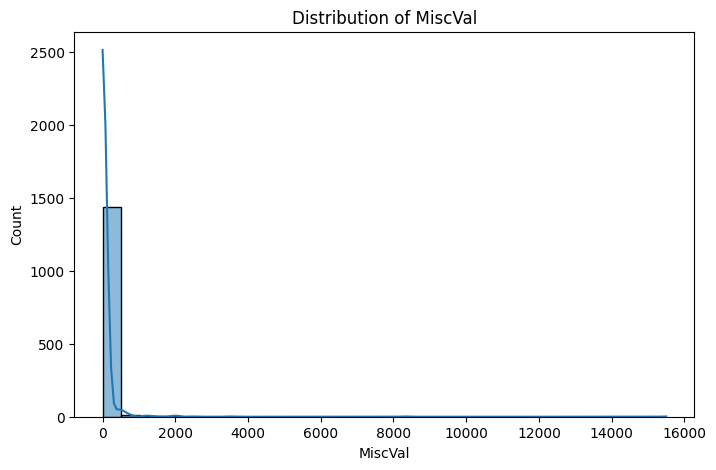

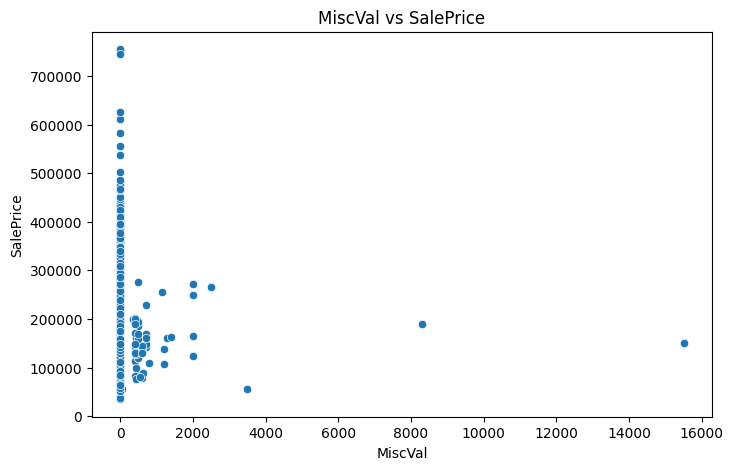

In [79]:
# Histogram of MiscVal
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='MiscVal', bins=30, kde=True)
plt.title("Distribution of MiscVal")
plt.show()


# Scatter plot (MiscVal vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='MiscVal', y='SalePrice')
plt.title("MiscVal vs SalePrice")
plt.show()


In [80]:
data.query('MiscVal>8000')

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
346    347          20       RL          NaN  9.455089   Pave   NaN      IR1   
1230  1231          90       RL          NaN  9.846441   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
346          Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
1230         Lvl    AllPub    Inside       Gtl       Sawyer      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
346        Norm     1Fam     1Story            6            8       1960   
1230       RRAe   Duplex     1.5Fin            5            5       1977   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
346           1998       Hip  CompShg     MetalSd     MetalSd        NaN   
1230          1977      Shed  CompShg     Plywood     Plywood        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
346          0.0        TA        Gd     CBlock       TA       TA   
1230         1.0        TA        TA     CBlock       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
346            Mn          BLQ         498          Unf           0   
1230           No          GLQ         498          Rec         211   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
346         460          958    GasA        TA          Y      SBrkr   
1230        652         1361    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
346        958         0             0        958             0             0   
1230      1361      1259             0       2620             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
346          1         0             2             1          TA   
1230         2         2             4             2          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
346              5        Typ           0         NaN     Attchd       1960.0   
1230            12        Typ           1          TA    BuiltIn       1977.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
346           RFn           1         301         TA         TA          Y   
1230          RFn           2         600         TA         TA          N   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
346            0            0              0          0            0   
1230         155           24            145          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
346          0    NaN   NaN        Gar2    15500       4    2007       WD   
1230         0    NaN   NaN        Gar2     8300       8    2007       WD   

     SaleCondition  SalePrice  
346         Normal     151500  
1230        Normal     190000

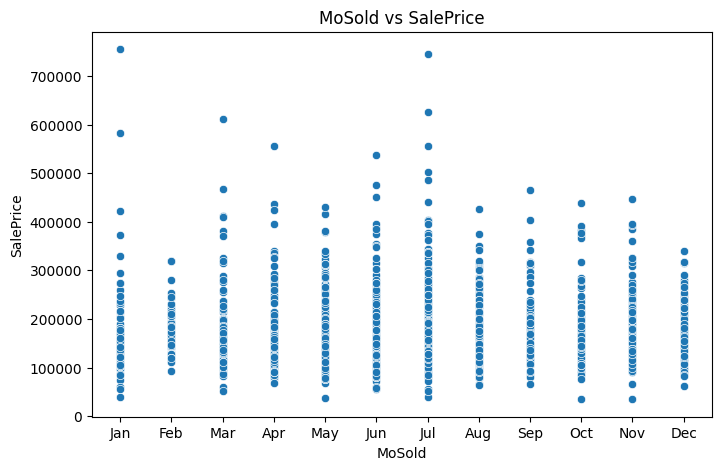

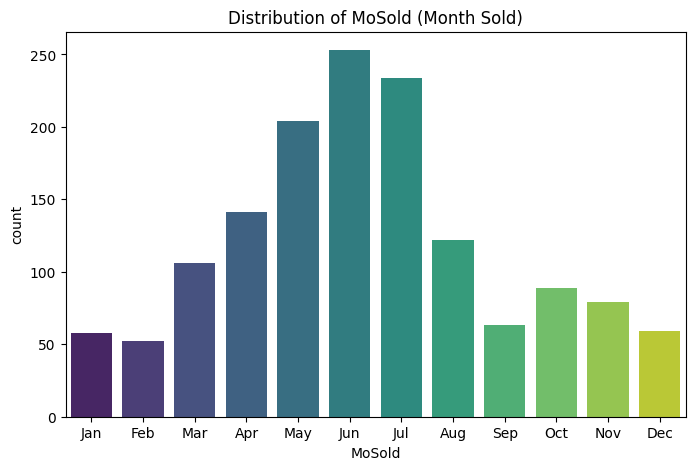

In [81]:
# Scatter plot (MoSold vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='MoSold', y='SalePrice')
plt.title("MoSold vs SalePrice")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()
# Bar plot of MoSold distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='MoSold', palette='viridis')
plt.title("Distribution of MoSold (Month Sold)")
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


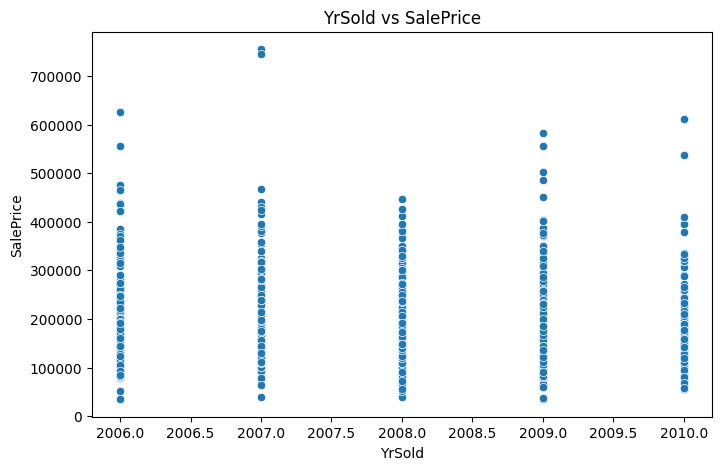

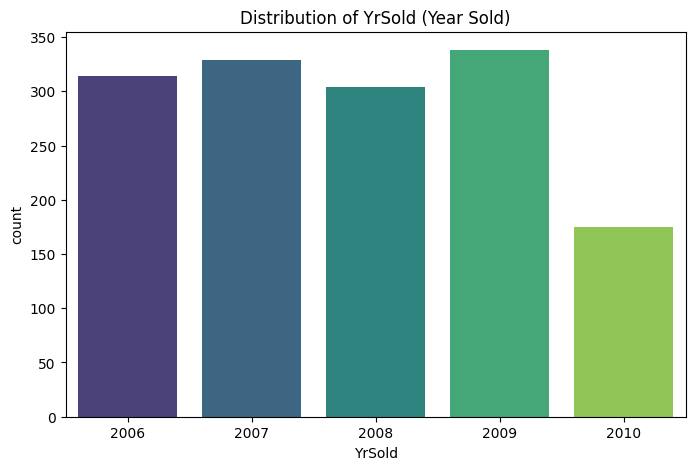

In [82]:
# Scatter plot (YrSold vs SalePrice)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='YrSold', y='SalePrice')
plt.title("YrSold vs SalePrice")
plt.show()
# Bar plot of YrSold distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='YrSold', palette='viridis')
plt.title("Distribution of YrSold (Year Sold)")
plt.show()


In [83]:
Anamoly_values=[1299,692,1191,636,584,582,524,1183,1329,54,49,379,314,323,347,441,186,810,955,739,278,692,456,198,1231]

In [84]:
len(Anamoly_values)

25

In [85]:
data=data[data.Id.isin(Anamoly_values)==False]

In [86]:
# Function to detect and impute outliers
def detect_and_impute_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outlier_count = outliers.shape[0]

    # Impute outliers with the median of the column
    median_value = data[column].median()
    data[column] = data[column].apply(lambda x: median_value if (x < lower_bound or x > upper_bound) else x)

    return outlier_count, data
#imputation
lotfrontage_outliers, data = detect_and_impute_outliers(data, 'LotFrontage')
print(f"Number of outliers in 'LotFrontage': {lotfrontage_outliers}")

lotarea_outliers, data = detect_and_impute_outliers(data, 'LotArea')
print(f"Number of outliers in 'LotArea': {lotarea_outliers}")


Number of outliers in 'LotFrontage': 100
Number of outliers in 'LotArea': 124


## NULL VALUES AND IMPUTATION

In [87]:
null_values = data.isnull().sum().to_frame().rename(columns={0: "Number of Null values"})
null_values["Percentage of Null Values"] = round((null_values["Number of Null values"] / len(data)) * 100, 2)

# Filter out columns where there are no missing values
missing_data = null_values[null_values["Number of Null values"] > 0]

# Sort by the number of null values in descending order
missing_data = missing_data.sort_values(by="Number of Null values", ascending=False)

# Display the sorted missing data summary
print(missing_data)



              Number of Null values  Percentage of Null Values
PoolQC                         1432                      99.72
MiscFeature                    1385                      96.45
Alley                          1347                      93.80
Fence                          1161                      80.85
MasVnrType                      858                      59.75
FireplaceQu                     683                      47.56
LotFrontage                     256                      17.83
GarageType                       77                       5.36
GarageYrBlt                      77                       5.36
GarageFinish                     77                       5.36
GarageQual                       77                       5.36
GarageCond                       77                       5.36
BsmtFinType2                     38                       2.65
BsmtExposure                     38                       2.65
BsmtFinType1                     37                    

In [88]:

data['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

MasVnrType: Masonry veneer type

BrkCmn-	Brick Common

BrkFace-Brick Face

CBlock-Cinder Block

None-None

Stone-Stone

In [89]:
data.MasVnrType.unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [90]:
data['MasVnrType'].fillna('None',inplace=True)

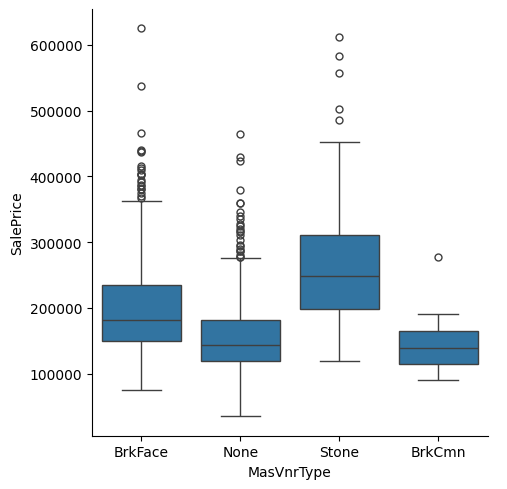

In [91]:
sns.catplot(data=data, x="MasVnrType", y="SalePrice", kind="box")


FireplaceQu: Fireplace quality

Ex	Excellent - Exceptional Masonry Fireplace

Gd	Good - Masonry Fireplace in main level

TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement

Fa	Fair - Prefabricated Fireplace in basement

Po	Poor - Ben Franklin Stove

NA	No- Fireplace

In [92]:
data.FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

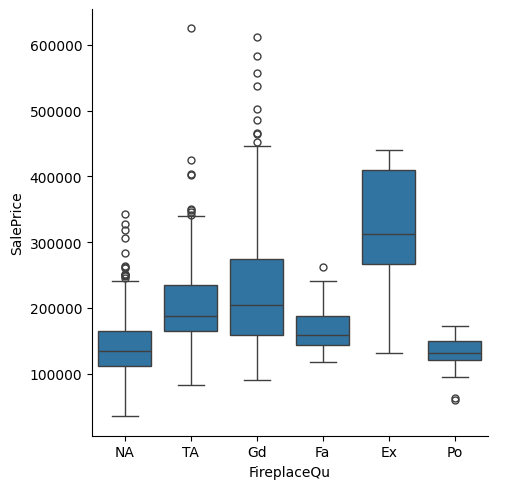

In [93]:
data.FireplaceQu.fillna('NA',inplace=True)
sns.catplot(data=data, x="FireplaceQu", y="SalePrice", kind="box")

In [94]:
data.LotFrontage.fillna(0,inplace=True)

In [95]:
data.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

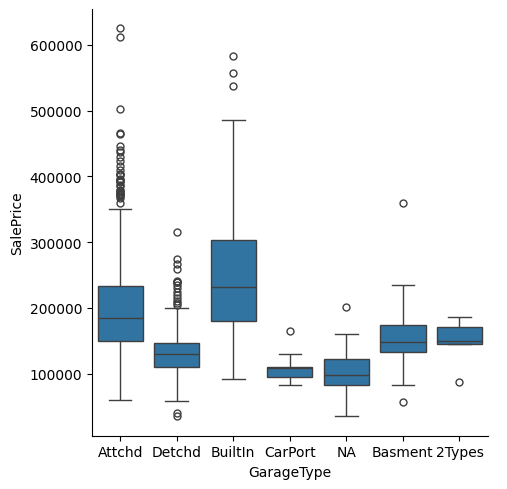

In [96]:
data.GarageType.fillna('NA',inplace=True)
sns.catplot(data=data,x='GarageType',y='SalePrice',kind='box')


In [97]:
data.GarageYrBlt.unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1964., 1999., 1935., 1990., 1945., 1987., 1989., 1915.,
       1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900., 1979.,
       1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926., 1955.,
       1981., 1986., 1988., 1916., 1932., 1972., 1980., 1924., 1996.,
       1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925., 1941.,
       1927., 1918., 1947., 1937., 1942., 1938., 1952., 1928., 1922.,
       1934., 1906., 1914., 2010., 1946., 1908., 1929., 1933.])

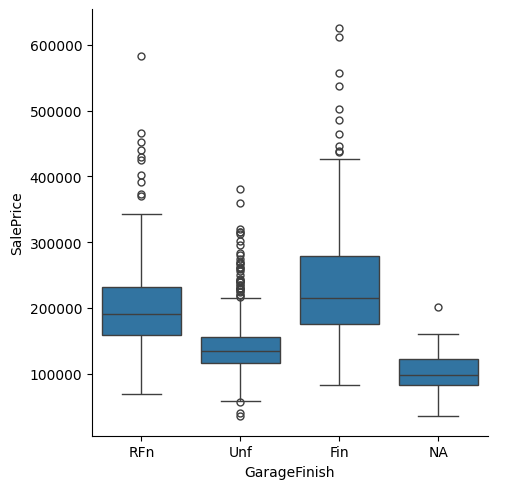

In [98]:
data.GarageFinish.unique()
data.GarageFinish.fillna('NA',inplace=True)
sns.catplot(data=data,x='GarageFinish',y='SalePrice',kind='box')

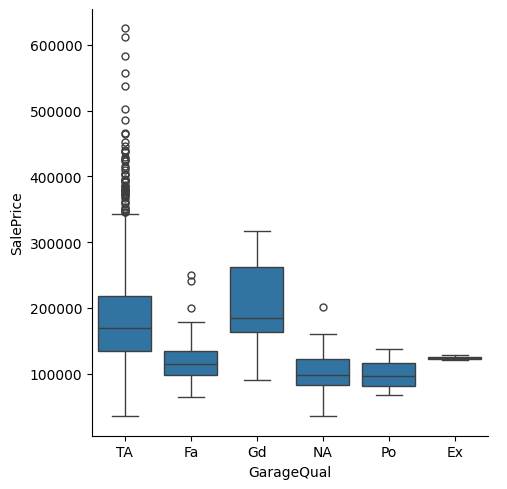

In [99]:
data.GarageQual.unique()
data.GarageQual.fillna('NA',inplace=True)
sns.catplot(data=data,x='GarageQual',y='SalePrice',kind='box')

In [100]:
data.GarageCond.unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

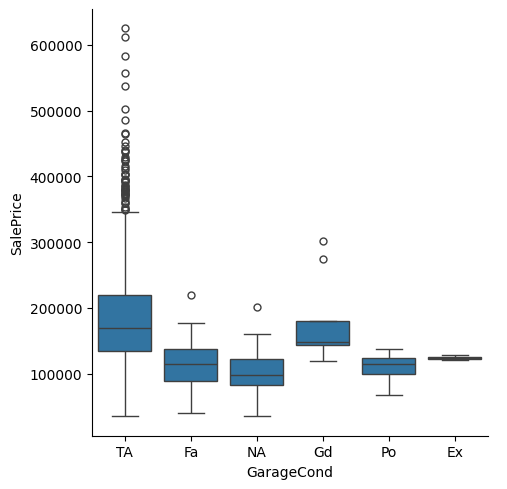

In [101]:

data.GarageCond.fillna('NA',inplace=True)
sns.catplot(data=data,x='GarageCond',y='SalePrice',kind='box')

In [102]:
data.BsmtFinType2.unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

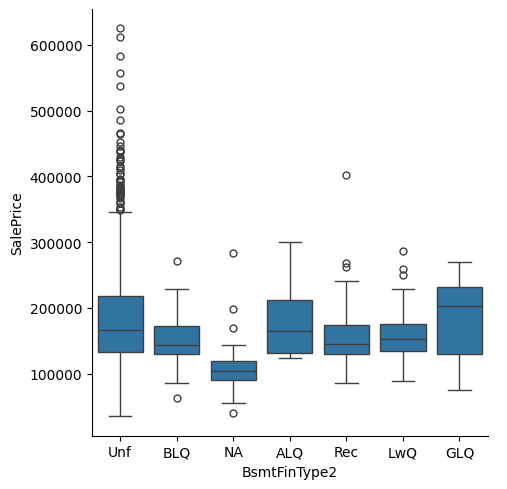

In [103]:

data.BsmtFinType2.fillna('NA',inplace=True)
sns.catplot(data=data,x='BsmtFinType2',y='SalePrice',kind='box')

In [104]:
data.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

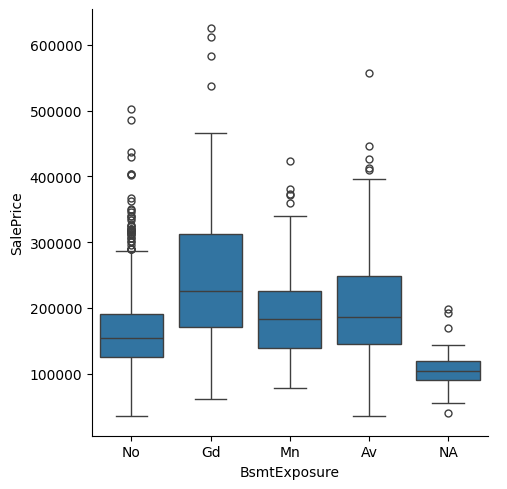

In [105]:
data.BsmtExposure.fillna('NA',inplace=True)
sns.catplot(data=data,x='BsmtExposure',y='SalePrice',kind='box')

In [106]:
data.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

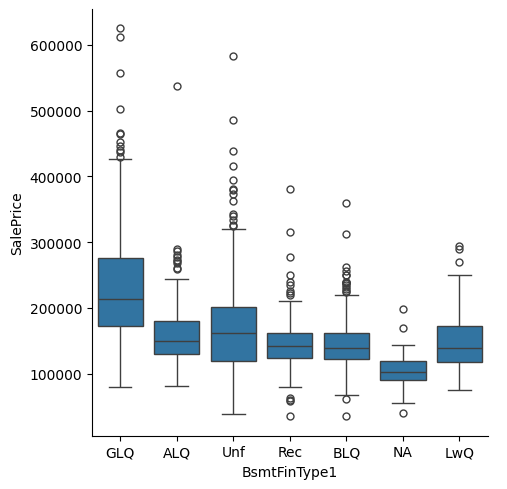

In [107]:
data.BsmtFinType1.fillna('NA',inplace=True)
sns.catplot(data=data,x='BsmtFinType1',y='SalePrice',kind='box')

In [108]:
data.BsmtCond.unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

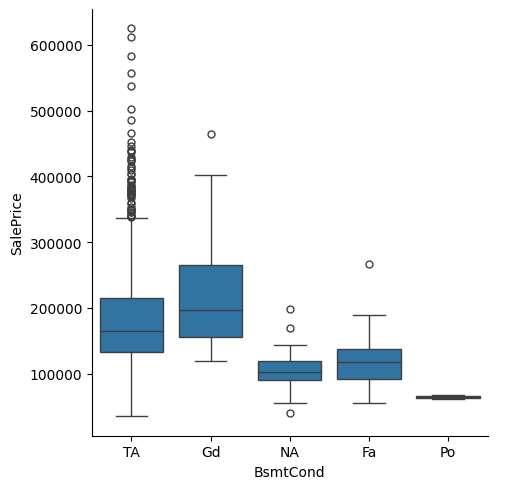

In [109]:
data.BsmtCond.fillna('NA',inplace=True)
sns.catplot(data=data,x='BsmtCond',y='SalePrice',kind='box')

In [110]:
data.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

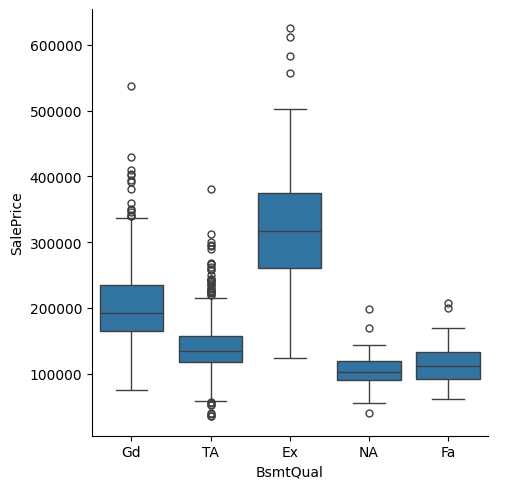

In [111]:
data.BsmtQual.fillna('NA',inplace=True)
sns.catplot(data=data,x='BsmtQual',y='SalePrice',kind='box')

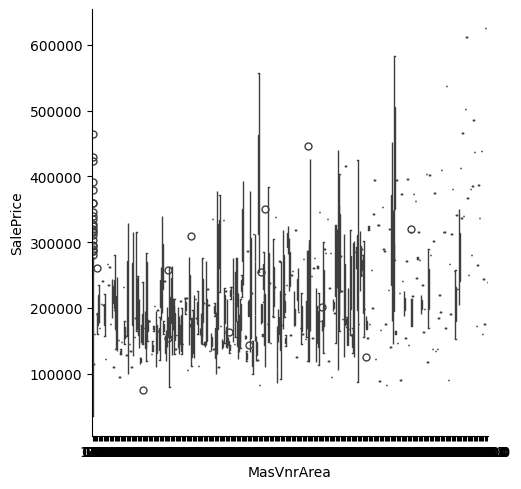

In [112]:
data.MasVnrArea.fillna(0,inplace=True)
sns.catplot(data=data,x='MasVnrArea',y='SalePrice',kind='box')

In [113]:
data.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

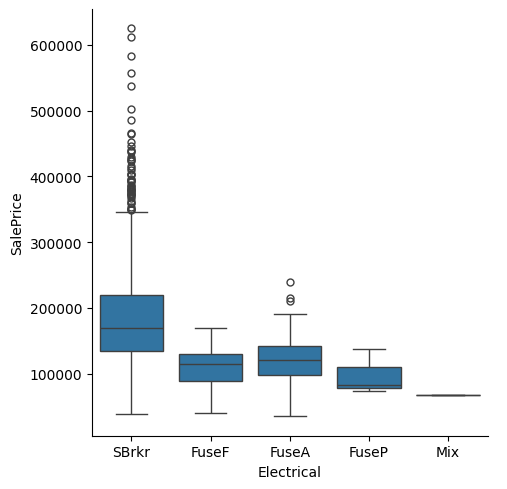

In [114]:
data.Electrical.fillna('SBrkr',inplace=True)
sns.catplot(data=data,x='Electrical',y='SalePrice',kind='box')

In [115]:
data=data.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence']) # DROPING THESE COLUMNS CAUSE IT HAVE OVER 90 PERCENT NULL VALUES SO THEY ARE INSIGNIFICANT

In [116]:
data['HouseAge']=data['YrSold']-data['YearBuilt']

In [117]:
data['HouseRemodAge']=data['YrSold']-data['YearRemodAdd']

In [118]:
data['totalsf']=data['TotalBsmtSF']+data['1stFlrSF']+data['2ndFlrSF']

In [119]:
data['totalArea']=data['totalsf']+data['GarageArea']
# drop livng area basement area

In [120]:
data['TotalBaths']=data['FullBath']+data['HalfBath']+0.5*(data['BsmtFullBath']+data['BsmtHalfBath'])

In [121]:
data['TotalPorch']=data['3SsnPorch']+data['OpenPorchSF']+data['EnclosedPorch']+data['ScreenPorch']+data['WoodDeckSF']

In [122]:
data=data.drop(columns=['YrSold','YearRemodAdd','YearBuilt','TotalBsmtSF','1stFlrSF','2ndFlrSF','GarageArea','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','Id','BsmtFinSF1','BsmtFinSF2','3SsnPorch','EnclosedPorch', 'ScreenPorch','WoodDeckSF','OpenPorchSF','GarageYrBlt','GrLivArea','MoSold'])

In [123]:
data.head()

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0          60       RL     4.189655  9.042040   Pave      Reg         Lvl   
1          20       RL     4.394449  9.169623   Pave      Reg         Lvl   
2          60       RL     4.234107  9.328212   Pave      IR1         Lvl   
3          70       RL     4.110874  9.164401   Pave      IR1         Lvl   
4          60       RL     4.442651  9.565284   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
0     2Story            7            5     Gable  CompShg     VinylSd   
1     1Story            6            8     Gable  CompShg     MetalSd   
2     2Story            7            5     Gable  CompShg     VinylSd   
3     2Story            7            5     Gable  CompShg     Wd Sdng   
4     2Story            8            5     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd   
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  BsmtUnfSF Heating  \
0       TA           No          GLQ          Unf        150    GasA   
1       TA           Gd          ALQ          Unf        284    GasA   
2       TA           Mn          GLQ          Unf        434    GasA   
3       Gd           No          ALQ          Unf        540    GasA   
4       TA           Av          GLQ          Unf        490    GasA   

  HeatingQC CentralAir Electrical  LowQualFinSF  BedroomAbvGr  KitchenAbvGr  \
0        Ex          Y      SBrkr             0             3             1   
1        Ex          Y      SBrkr             0             3             1   
2        Ex          Y      SBrkr             0             3             1   
3        Gd          Y      SBrkr             0             3             1   
4        Ex          Y      SBrkr             0             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0          NA     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3          Gd             7        Typ           1          Gd     Detchd   
4          Gd             9        Typ           1          TA     Attchd   

  GarageFinish  GarageCars GarageQual GarageCond PavedDrive  PoolArea  \
0          RFn           2         TA         TA          Y         0   
1          RFn           2         TA         TA          Y         0   
2          RFn           2         TA         TA          Y         0   
3          Unf           3         TA         TA          Y         0   
4          RFn           3         TA         TA          Y         0   

   MiscVal SaleType SaleCondition  SalePrice  HouseAge  HouseRemodAge  \
0        0       WD        Normal     208500         5              5   
1        0       WD        Normal     181500        31             31   
2        0       WD        Normal     223500         7              6   
3        0       WD       Abnorml     14000

In [124]:
data.shape

(1436, 61)

In [125]:
data.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
HouseRemodAge    0
totalsf          0
totalArea        0
TotalBaths       0
TotalPorch       0
Length: 61, dtype: int64

# CORRELATION PLOT

<Axes: >

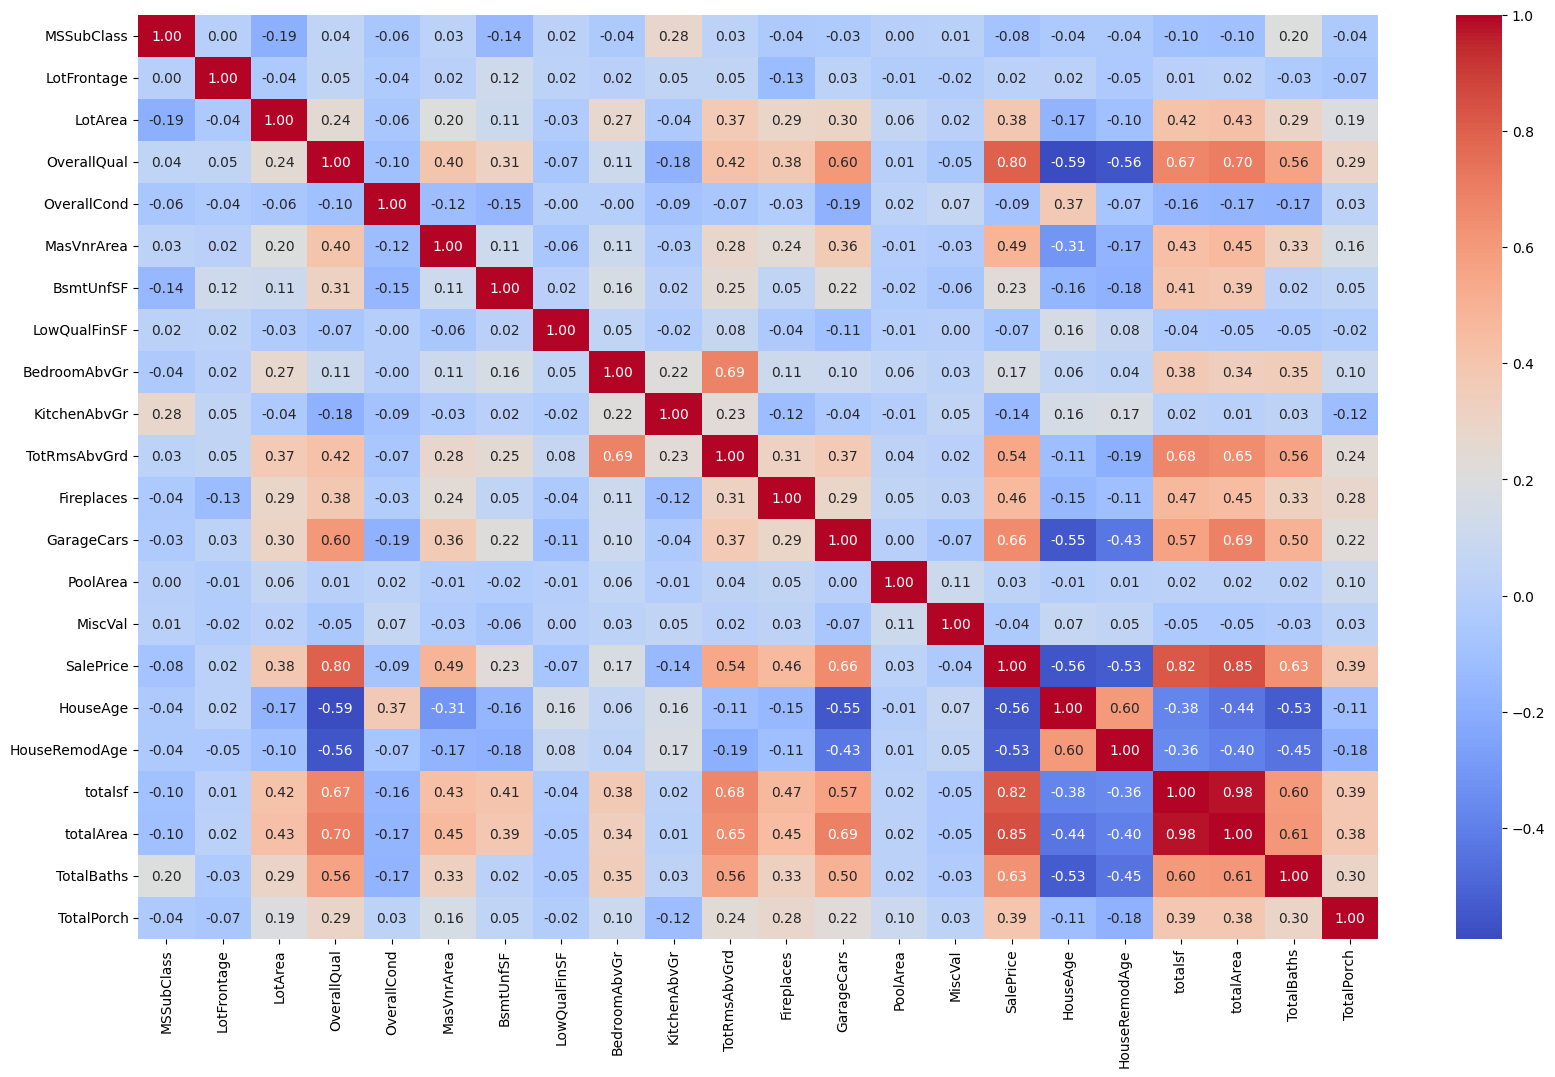

In [126]:
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

 ## Task
 Determine the relationship between the house features and how the price varies based on this.

In [127]:
corr_with_target = correlation_matrix["SalePrice"].sort_values(ascending=False)
print(corr_with_target)


SalePrice        1.000000
totalArea        0.851681
totalsf          0.824871
OverallQual      0.799150
GarageCars       0.655233
TotalBaths       0.632320
TotRmsAbvGrd     0.541378
MasVnrArea       0.486226
Fireplaces       0.457702
TotalPorch       0.393034
LotArea          0.379034
BsmtUnfSF        0.225111
BedroomAbvGr     0.173057
PoolArea         0.029204
LotFrontage      0.022469
MiscVal         -0.042182
LowQualFinSF    -0.070313
MSSubClass      -0.083242
OverallCond     -0.086103
KitchenAbvGr    -0.142374
HouseRemodAge   -0.531822
HouseAge        -0.558097
Name: SalePrice, dtype: float64


##📌 Final Features to Drop

OverallCond	0.09	(Very low impact)

MSSubClass	0.08	(Very low impact)

LowQualFinSF	0.07(Very low impact)

MiscVal	0.04	(Very low impact)

PoolArea	0.03	(Very low impact)

LotFrontage	0.02	(Very low impact)

totalsf	0.82	(Highly correlated with totalArea)

In [128]:
data=data.drop(columns=["OverallCond", "MSSubClass", "LowQualFinSF", "MiscVal", "PoolArea", "LotFrontage"])

In [129]:
data.dtypes[data.dtypes=='object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [130]:
count_object_columns = (data.dtypes == 'object').sum()
print(count_object_columns)

39


In [131]:
data.dtypes[data.dtypes!='object']

LotArea          float64
OverallQual        int64
MasVnrArea       float64
BsmtUnfSF          int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageCars         int64
SalePrice          int64
HouseAge           int64
HouseRemodAge      int64
totalsf            int64
totalArea          int64
TotalBaths       float64
TotalPorch         int64
dtype: object

In [132]:
ohe_columns=['MSZoning','Street','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','GarageType','SaleType','SaleCondition','Electrical']

In [133]:
len(ohe_columns)

19

In [134]:
ode_columns=['ExterQual','ExterCond','LotShape','LandContour','Utilities','LandSlope','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [135]:
len(ode_columns)

20

In [136]:
numerical_columns=data.select_dtypes(include=['int64','float64']).columns
numerical_columns=numerical_columns.drop('SalePrice')

In [137]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler

In [138]:
ode_pipeline=Pipeline([
    ('ordinal',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1))
])

In [139]:
ohe_pipeline=Pipeline([
    ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False,drop='first'))
])


In [140]:
col_trans=ColumnTransformer([
    ('ode',ode_pipeline,ode_columns),
    ('ohe',ohe_pipeline,ohe_columns)
]
,remainder='passthrough',
n_jobs=-1
)


In [141]:
pipeline=Pipeline(
    steps=[('preprocessing',col_trans)]
)

In [142]:
data.head()

MSZoning   LotArea Street LotShape LandContour Utilities LotConfig  \
0       RL  9.042040   Pave      Reg         Lvl    AllPub    Inside   
1       RL  9.169623   Pave      Reg         Lvl    AllPub       FR2   
2       RL  9.328212   Pave      IR1         Lvl    AllPub    Inside   
3       RL  9.164401   Pave      IR1         Lvl    AllPub    Corner   
4       RL  9.565284   Pave      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            7     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            6     Gable  CompShg     MetalSd     MetalSd       None   
2            7     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            7     Gable  CompShg     Wd Sdng     Wd Shng       None   
4            8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1 BsmtFinType2  BsmtUnfSF Heating HeatingQC CentralAir  \
0          GLQ          Unf        150    GasA        Ex          Y   
1          ALQ          Unf        284    GasA        Ex          Y   
2          GLQ          Unf        434    GasA        Ex          Y   
3          ALQ          Unf        540    GasA        Gd          Y   
4          GLQ          Unf        490    GasA        Ex          Y   

  Electrical  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0      SBrkr             3             1          Gd             8        Typ   
1      SBrkr             3             1          TA             6        Typ   
2      SBrkr             3             1          Gd             6        Typ   
3      SBrkr             3             1          Gd             7        Typ   
4      SBrkr             4             1          Gd             9        Typ   

   Fireplaces FireplaceQu GarageType GarageFinish  GarageCars GarageQual  \
0           0          NA     Attchd          RFn           2         TA   
1           1          TA     Attchd          RFn           2         TA   
2           1          TA     Attchd          RFn           2         TA   
3           1          Gd     Detchd          Unf           3         TA   
4           1          TA     Attchd          RFn           3         TA   

  GarageCond PavedDrive SaleType SaleCondition  SalePrice  HouseAge  \
0         TA          Y       WD        Normal     208500         5   
1         TA          Y       WD        Normal     181500        31   
2         TA          Y       WD        Normal     223500         7   
3         TA          Y       WD       Abnorml     140000        91   
4         TA          Y       WD        Normal     250000         8   

   HouseRemodAge  totalsf  totalArea  TotalBaths  TotalPorch  
0              5     2566       3114         3.5          61  
1             31     2524       2984         2.5         298  
2              6     2706       3314         3.5          42  
3             36     2473       3115         1.5         307  
4              8     3343       4179         3.5         276

In [143]:
data.columns

Index(['MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'SalePrice',
       'HouseAge', 'HouseRemodAge', 'totalsf', 'totalArea', 'TotalBaths',
       'TotalPorch'],
      dtype='object')

In [144]:
x=data.drop(columns=['SalePrice'],axis=1)
y=data['SalePrice']

In [145]:
x_processed=pipeline.fit_transform(x)

In [146]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor, VotingRegressor
from sklearn.linear_model import RidgeCV, LassoCV, PoissonRegressor,Ridge
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
from scipy.stats import uniform


In [147]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_processed,y,test_size=0.2,random_state=42)

##StandardScaler
 StandardScaler makes data balanced by setting the mean to 0 and spread to 1. It helps models work better by keeping all features on a similar scale

In [148]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## Lazy predictor
LazyPredict is a Python library that quickly trains and evaluates multiple machine learning models with minimal effort. It helps compare different models' performance without manual tuning. It’s useful for baseline modeling and rapid prototyping

In [149]:
!pip install lazypredict



In [150]:
from lazypredict.Supervised import LazyRegressor
# Initialize LazyRegressor
lazy_reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit and evaluate models
models, predictions = lazy_reg.fit(x_train, x_test, y_train, y_test)

# Display results
print(models)


 98%|█████████▊| 41/42 [00:45<00:00,  1.43it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1964
[LightGBM] [Info] Number of data points in the train set: 1148, number of used features: 107
[LightGBM] [Info] Start training from score 180969.408537


100%|██████████| 42/42 [00:45<00:00,  1.09s/it]

                               Adjusted R-Squared   R-Squared         RMSE  \
Model                                                                        
PoissonRegressor                             0.78        0.91     19804.18   
GammaRegressor                               0.77        0.91     19979.19   
XGBRegressor                                 0.76        0.90     20476.96   
GradientBoostingRegressor                    0.76        0.90     20637.85   
LassoLarsCV                                  0.75        0.89     21147.56   
LassoCV                                      0.74        0.89     21174.73   
LassoLarsIC                                  0.74        0.89     21182.91   
PassiveAggressiveRegressor                   0.74        0.89     21371.95   
BayesianRidge                                0.74        0.89     21392.08   
HistGradientBoostingRegressor                0.74        0.89     21395.60   
LGBMRegressor                                0.73        0.89   

In [151]:
lasso_cv = LassoCV(alphas=np.logspace(-3, 3, 100), cv=5, random_state=42)
lasso_cv.fit(x_train, y_train)

print("Best Alpha:", lasso_cv.alpha_)
y_train_pred = lasso_cv.predict(x_train)
y_test_pred = lasso_cv.predict(x_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)



print(f"LassoCV Model Performance:")
print(f"Train R²: {train_r2:.2f} | Test R²: {test_r2:.2f}")
print(f"Train RMSE: {train_rmse:.2f} | Test RMSE: {test_rmse:.2f}")



Best Alpha: 432.87612810830615
LassoCV Model Performance:
Train R²: 0.92 | Test R²: 0.89
Train RMSE: 22049.33 | Test RMSE: 21175.89


In [152]:
ridge_model = Ridge()
param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0, 100.0],
    'fit_intercept': [True, False]
}

ridge_cv = GridSearchCV(ridge_model, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(x_train, y_train)

best_ridge_params = ridge_cv.best_params_
print(f"Best Ridge Parameters: {best_ridge_params}")
ridge_best_model = ridge_cv.best_estimator_

# Predict and evaluate on train data
y_train_pred_ridge = ridge_best_model.predict(x_train)
y_test_pred_ridge = ridge_best_model.predict(x_test)


train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
train_rmse_ridge = np.sqrt(train_mse_ridge)
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)

# Evaluation on test set
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
test_rmse_ridge = np.sqrt(test_mse_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

# Print results
print(f"Ridge Model - Best Hyperparameters: {best_ridge_params}")
print(f"Train MSE: {train_mse_ridge:.4f}, Test MSE: {test_mse_ridge:.4f}")
print(f"Train RMSE: {train_rmse_ridge:.4f}, Test RMSE: {test_rmse_ridge:.4f}")
print(f"Train R²: {train_r2_ridge:.4f}, Test R²: {test_r2_ridge:.4f}")

# Cross-validation scores (optional: check the performance of the model using cross-validation)
cv_scores = cross_val_score(ridge_best_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = np.mean(cv_scores)
print(f"Mean Cross-Validation Score (Negative MSE): {mean_cv_score:.4f}")


Best Ridge Parameters: {'alpha': 100.0, 'fit_intercept': True}
Ridge Model - Best Hyperparameters: {'alpha': 100.0, 'fit_intercept': True}
Train MSE: 471166889.7151, Test MSE: 456073264.5544
Train RMSE: 21706.3790, Test RMSE: 21355.8719
Train R²: 0.9216, Test R²: 0.8924
Mean Cross-Validation Score (Negative MSE): -601406645.1449


In [153]:

gbr_model = GradientBoostingRegressor(
    n_estimators=250,
    learning_rate=0.03,
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=3,
    subsample=0.75,
    max_features='sqrt',
    random_state=42
)
gbr_model.fit(x_train, y_train)

# Display results
print(f"Gradient Boosting Model Performance:")
print(f"Train R²: {train_r2:.2f} | Test R²: {test_r2:.2f}")
print(f"Train RMSE: {train_rmse:.2f} | Test RMSE: {test_rmse:.2f}")




Gradient Boosting Model Performance:
Train R²: 0.92 | Test R²: 0.89
Train RMSE: 22049.33 | Test RMSE: 21175.89


In [154]:
gbr_model = GradientBoostingRegressor(random_state=42)

param_grid_gbr = {
    'n_estimators': [50, 100, 150,200,250,300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'max_features':['sqrt'],
    'min_samples_split': [2, 5, 10,15]
}

gbr_cv = GridSearchCV(gbr_model, param_grid_gbr, cv=5, scoring='neg_mean_squared_error')

gbr_cv.fit(x_train, y_train)

best_gbr_params = gbr_cv.best_params_
print(f"Best Gradient Boosting Regressor Parameters: {best_gbr_params}")

gbr_best_model = gbr_cv.best_estimator_
y_train_pred_gbr = gbr_best_model.predict(x_train)
y_test_pred_gbr = gbr_best_model.predict(x_test)

# Evaluation
train_mse_gbr = mean_squared_error(y_train, y_train_pred_gbr)
train_rmse_gbr = np.sqrt(train_mse_gbr)
train_r2_gbr = r2_score(y_train, y_train_pred_gbr)

test_mse_gbr = mean_squared_error(y_test, y_test_pred_gbr)
test_rmse_gbr = np.sqrt(test_mse_gbr)
test_r2_gbr = r2_score(y_test, y_test_pred_gbr)

# Print results
print(f"Gradient Boosting Regressor Model - Best Hyperparameters:")
print(f"Train MSE: {train_mse_gbr:.4f}, Test MSE: {test_mse_gbr:.4f}")
print(f"Train RMSE: {train_rmse_gbr:.4f}, Test RMSE: {test_rmse_gbr:.4f}")
print(f"Train R²: {train_r2_gbr:.4f}, Test R²: {test_r2_gbr:.4f}")


Best Gradient Boosting Regressor Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 0.9}
Gradient Boosting Regressor Model - Best Hyperparameters:
Train MSE: 137753239.2786, Test MSE: 386806263.1011
Train RMSE: 11736.8326, Test RMSE: 19667.3909
Train R²: 0.9771, Test R²: 0.9087


In [155]:
lgb_model = lgb.LGBMRegressor()
param_dist_lgb = {
    'num_leaves': list(range(20, 70, 10)),
    'max_depth':list(range(2, 12, 2)),
    'learning_rate': uniform(0.01, 0.1),
    'n_estimators': [100, 200, 300, 400],
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'lambda_l1': [0, 0.1, 1, 10],
    'lambda_l2': [0, 0.1, 1, 10],
    'min_data_in_leaf': [10, 20, 30, 50]
}


lgb_cv = RandomizedSearchCV(
    lgb_model, param_distributions=param_dist_lgb,
    n_iter=100, cv=5, scoring='neg_mean_squared_error',
    random_state=42, n_jobs=-1
)


lgb_cv.fit(x_train, y_train)
best_lgb_params =lgb_cv.best_params_
print(f"Best LGBM Parameters: {best_lgb_params}")
lgb_best_model = lgb_cv.best_estimator_


y_train_pred_lgb = lgb_best_model.predict(x_train)
y_test_pred_lgb = lgb_best_model.predict(x_test)

# Evaluation
train_mse_lgb = mean_squared_error(y_train, y_train_pred_lgb)
train_rmse_lgb = np.sqrt(train_mse_lgb)
train_r2_lgb = r2_score(y_train, y_train_pred_lgb)

test_mse_lgb = mean_squared_error(y_test, y_test_pred_lgb)
test_rmse_lgb = np.sqrt(test_mse_lgb)
test_r2_lgb = r2_score(y_test, y_test_pred_lgb)

# Print results
print(f"LGBM Model - Best Hyperparameters:")
print(f"Train MSE: {train_mse_lgb:.4f}, Test MSE: {test_mse_lgb:.4f}")
print(f"Train RMSE: {train_rmse_lgb:.4f}, Test RMSE: {test_rmse_lgb:.4f}")
print(f"Train R²: {train_r2_lgb:.4f}, Test R²: {test_r2_lgb:.4f}")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1988
[LightGBM] [Info] Number of data points in the train set: 1148, number of used features: 115
[Ligh

In [156]:


param_dist = {
    'n_estimators': range(300, 700, 100),
    'max_depth': range(15, 26, 5),
    'min_samples_split': range(10, 31, 5),
    'min_samples_leaf': range(5, 11, 1),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True],
    'random_state': [42]
}


rf_model = RandomForestRegressor()


rf_cv = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)


rf_cv.fit(x_train, y_train)


best_model = rf_cv.best_estimator_

y_train_pred = best_model.predict(x_train)
y_test_pred = best_model.predict(x_test)

# Calculate evaluation metrics for the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Print the best parameters and evaluation metrics
print(f"Best Parameters: {rf_cv.best_params_}")
print(f"Train MSE: {train_mse:.4f}, Train RMSE: {train_rmse:.4f}, Train R²: {train_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, Test RMSE: {test_rmse:.4f}, Test R²: {test_r2:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'random_state': 42, 'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
Train MSE: 685075101.5898, Train RMSE: 26173.9394, Train R²: 0.8860
Test MSE: 674783971.3151, Test RMSE: 25976.6043, Test R²: 0.8408


In [157]:
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_absolute_error
poisson_reg = PoissonRegressor()
param_grid = {
    'alpha': [0.01, 0.1, 1, 10]
}

poisson_cv = GridSearchCV(poisson_reg, param_grid, cv=5, scoring='neg_mean_absolute_error')
poisson_cv.fit(x_train, y_train)


print(f"Best Params: {poisson_cv.best_params_}")
print(f"Best MAE: {poisson_cv.best_score_}")


best_poisson = poisson_cv.best_estimator_
y_pred = best_poisson.predict(x_test)


mae = mean_absolute_error(y_test, y_pred)
print(f"Final MAE on Test Set: {mae}")

# Calculate the evaluation metrics for the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate the evaluation metrics for the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}, Train RMSE: {train_rmse:.4f}, Train R²: {train_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, Test RMSE: {test_rmse:.4f}, Test R²: {test_r2:.4f}")


Best Params: {'alpha': 10}
Best MAE: -14924.883758638684
Final MAE on Test Set: 14320.863896437024
Train MSE: 685075101.5898, Train RMSE: 26173.9394, Train R²: 0.8860
Test MSE: 674783971.3151, Test RMSE: 25976.6043, Test R²: 0.8408


In [158]:
ridge_model = ridge_cv.best_estimator_
poisson_model = poisson_cv.best_estimator_
gbr_model = gbr_cv.best_estimator_
lgb_model = lgb_cv.best_estimator_
rf_model = rf_cv.best_estimator_



voting_regressor = VotingRegressor(
    estimators=[
        ('lgb',lgb_model),
        ('poission',poisson_model),
        ('Lasso',lasso_cv)
    ]

)

voting_regressor.fit(x_train, y_train)

y_train_pred = voting_regressor.predict(x_train)
y_test_pred = voting_regressor.predict(x_test)

# Calculate evaluation metrics for the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print(f"Voting Regressor Model - Performance:")
print(f"Train MSE: {train_mse:.4f}, Train RMSE: {train_rmse:.4f}, Train R²: {train_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, Test RMSE: {test_rmse:.4f}, Test R²: {test_r2:.4f}")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1988
[LightGBM] [Info] Number of data points in the train set: 1148, number of used features: 115
[Ligh

In [159]:
base_models = [
    ('poission',poisson_model),
    ('ridge', ridge_model),
    ('gbr', gbr_model),
    ('Lasso',lasso_cv)

]
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator= lgb_model
)
stacking_model.fit(x_train, y_train)

# Make predictions
y_train_pred = stacking_model.predict(x_train)
y_test_pred = stacking_model.predict(x_test)

# Calculate evaluation metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print(f"Stacking Regressor Model - Performance:")
print(f"Train MSE: {train_mse:.4f}, Train RMSE: {train_rmse:.4f}, Train R²: {train_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, Test RMSE: {test_rmse:.4f}, Test R²: {test_r2:.4f}")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 1148, number of used features: 4
[LightGBM] [Info] Start training from score 180969.408537
[LightGBM] [W

In [160]:
base_models = [
    ('ridge', ridge_model),
    ('gbr', gbr_model),
    ('lgb', lgb_model),
    ('rf', rf_model),
    ('lasso', lasso_cv)
]

stacked_model = StackingRegressor(estimators=base_models, final_estimator=ridge_model, n_jobs=-1)

# Train Stacking Model
stacked_model.fit(x_train, y_train)

# Predictions
y_train_pred_stack = stacked_model.predict(x_train)
y_test_pred_stack = stacked_model.predict(x_test)

# Evaluate Performance
train_mse_stack = mean_squared_error(y_train, y_train_pred_stack)
test_mse_stack = mean_squared_error(y_test, y_test_pred_stack)

train_r2_stack = r2_score(y_train, y_train_pred_stack)
test_r2_stack = r2_score(y_test, y_test_pred_stack)

print(f"Stacked Model Train R²: {train_r2_stack:.4f}, Test R²: {test_r2_stack:.4f}")
print(f"Stacked Model Train MSE: {train_mse_stack:.4f}, Test MSE: {test_mse_stack:.4f}")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
Stacked Model Train R²: 0.9693, Test R²: 0.9169
Stacked Model Train MSE: 184549720.1994, Test MSE: 352151231.7771


Stacking Strategy

Base Learners: ridge_model, gbr_model, lgb_model, rf_model, lasso_cv

Final Estimator: Ridge Regression or a Voting Regressor

Ridge works well in stacking as it stabilizes the final prediction.

A Voting Regressor (averaging predictions) can also be effective.

## Comparision of the models



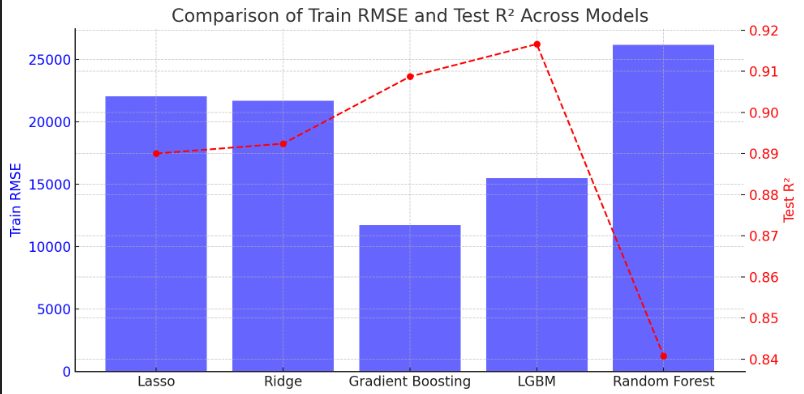

In [163]:
from PIL import Image
img = Image.open("/content/Screenshot 2025-02-28 150850.png")
display(img)

Here is the comparison graph of Train RMSE and Test R² across different models. The blue bars represent Train RMSE, while the red dashed line represents Test R².


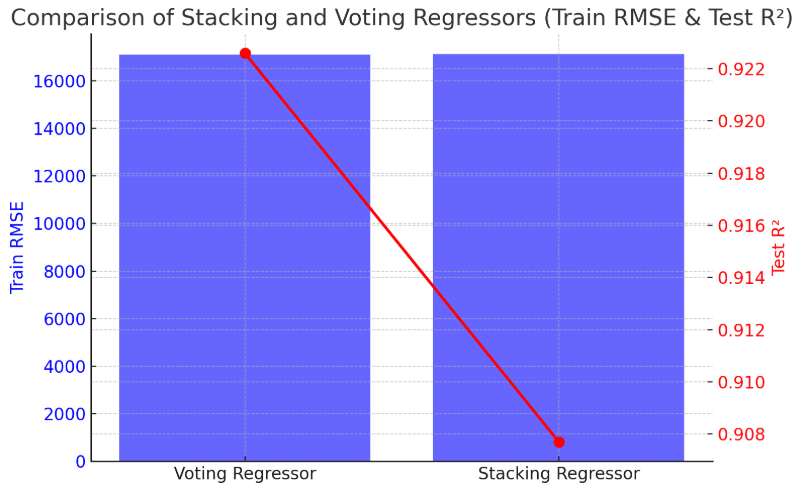

In [164]:
from PIL import Image
img = Image.open("/content/Screenshot 2025-02-28 151320.png")
display(img)

Here is the graph comparing the Train RMSE (blue bars) and Test R² (red line) for the Voting and Stacking Regressors.

## Task
 Come up with suggestions for the customer to buy the house according to the area, price and other requirements

📊 Insights from Advanced Regression Analysis
Using techniques like Ridge Regression, Gradient Boosting, and SHAP value analysis, we can determine the key factors influencing house prices.

## 1. Budget-Based Recommendations


 Low Budget Homes (< $150,000)
Look for older homes (built before 1990) with moderate living area.
Consider homes with unfinished basements or smaller garages to reduce costs.
Neighborhood selection is key—opt for areas with upcoming infrastructure development.

Mid-Range Homes ($150,000 - $300,000)
Prioritize houses with modern upgrades (kitchen, flooring, and bathrooms).
Homes with moderate to large living space (~1,500+ sq. ft.) and 2-car garages hold better value.
Areas with good schools, parks, and commercial centers can be ideal for long-term value.

Luxury Homes ($300,000+)
Look for premium-quality materials (OverallQual > 8) and high-end finishes.
Larger lot sizes and additional features (e.g., pools, finished basements, smart home tech) increase home value.
Invest in high-demand neighborhoods with low inventory to ensure price appreciation.

## 2. Best Areas Based on Value & Growth

High-Value Areas (Premium & Resale Value)
Established neighborhoods with strong real estate demand.
Homes with high Overall Quality, large living space, and premium locations tend to retain value.
Areas with good connectivity, schools, and low crime rates are ideal.

Emerging Growth Areas (Affordable & Future Appreciation)
Locations with new infrastructure (roads, shopping centers, parks).
Neighborhoods where home prices are rising steadily but are still below city averages.
Ideal for buyers looking for investment opportunities with long-term appreciation.

.
## 3. Key Features Influencing Price

### 📌 Top Features Affecting House Price:

✔ Overall Quality (OverallQual) – Strongest predictor of price.

✔ Living Area (GrLivArea) – More space increases house value.

✔ Total Basement Area (TotalBsmtSF) – Finished basements add significant value.

✔ Garage Size (GarageCars) – 2+ car garages increase desirability.

✔ Lot Size (LotArea) – More land leads to higher prices.

✔ Remodeling & Age (YearRemodAdd) – Newer homes & remodeled properties command higher prices.

### 📌 Features with Lesser Impact:

❌ Fireplaces, Pools, and Fences – Nice to have but not primary price drivers.

❌ Neighborhood Crime Rate – May influence demand but has moderate correlation with price.

❌ Exterior Condition (ExteriorCond) – Only affects price when extremely poor.



# Challenges Faced


### Feature Understanding

The dataset has 79 features, some of which are unfamiliar.

### Feature Selection & Engineering

Not all features are useful—some of are correlated or redundant.

Creating new features (e.g., price per square foot, total house age) can improve model performance.

### Multicollinearity Issues

Some features are highly correlated, causing instability in models.

### Model Selection & Hyperparameter Tuning

Advanced regression models (like Gradient Boosting, Random Forest, and Stacking) require proper tuning.
Balancing bias-variance tradeoff is key

### PCA
we tried pca too with variance 90 and 95 but scores were deterioating 

